In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error,r2_score
from google.colab import drive
import kagglehub

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
# Mount Google Drive to access files
drive.mount("/content/drive", force_remount=True)

# Download latest version
#path = kagglehub.dataset_download("jahaidulislam/car-specification-dataset-1945-2020")

#print("Path to dataset files:", path)

Mounted at /content/drive


In [ ]:
# Use shutil.copytree to copy the directory recursively
try:
    shutil.copytree('/root/.cache/kagglehub/datasets/jahaidulislam/car-specification-dataset-1945-2020/versions/1', '/content/drive/MyDrive/UNT/testproject/car_data')
    print("Directory copied successfully.")
except FileExistsError:
    print("Directory already exists. Skipping copy operation.")
except FileNotFoundError:
    print("Source directory not found. Please check the path.")
except Exception as e:
    print(f"An error occurred during the copy operation: {e}")


Source directory not found. Please check the path.


In [ ]:
car_data = pd.read_csv('/content/drive/MyDrive/UNT/testproject/car_data/Car_Dataset_1945-2020.csv')

<ipython-input-483-cf2a78adb97c>:1: DtypeWarning: Columns (9,11,12,13,14,15,16,17,19,20,24,27,29,33,43,44,47,49,51,69,75,77) have mixed types. Specify dtype option on import or set low_memory=False.
  car_data = pd.read_csv('/content/drive/MyDrive/UNT/testproject/car_data/Car_Dataset_1945-2020.csv')


In [ ]:
car_data.head(10)
car_data.columns

,id_trim,Make,Modle,Generation,Year_from,Year_to,Series,Trim,Body_type,load_height_mm,...,front_suspension,steering_type,car_class,country_of_origin,number_of_doors,safety_assessment,rating_name,battery_capacity_KW_per_h,electric_range_km,charging_time_h
0,1,AC,ACE,1 generation,1993.0,2000.0,Cabriolet,3.5 MT,Cabriolet,NaN,...,Helical springs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,AC,ACE,1 generation,1993.0,2000.0,Cabriolet,4.6 MT,Cabriolet,NaN,...,Helical springs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,AC,ACE,1 generation,1993.0,2000.0,Cabriolet,4.9 AT,Cabriolet,NaN,...,Helical springs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,AC,ACE,1 generation,1993.0,2000.0,Roadster,2.9 AT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,AC,ACE,1 generation,1993.0,2000.0,Roadster,2.9 MT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,AC,ACE,1 generation,1993.0,2000.0,Roadster,3.0 MT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,AC,ACE,1 generation,1993.0,2000.0,Roadster,3.5 MT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,AC,ACE,1 generation,1993.0,2000.0,Roadster,4.6 MT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,AC,ACE,1 generation,1993.0,2000.0,Roadster,4.9 AT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,AC,Aceca,1 generation,1998.0,2001.0,Coupe,3.5 MT,Coupe,NaN,...,Helical springs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Index(['id_trim', 'Make', 'Modle', 'Generation', 'Year_from', 'Year_to',
       'Series', 'Trim', 'Body_type', 'load_height_mm', 'number_of_seats',
       'length_mm', 'width_mm', 'height_mm', 'wheelbase_mm', 'front_track_mm',
       'rear_track_mm', 'curb_weight_kg', 'wheel_size_r14',
       'ground_clearance_mm', 'trailer_load_with_brakes_kg', 'payload_kg',
       'back_track_width_mm', 'front_track_width_mm', 'clearance_mm',
       'full_weight_kg', 'front_rear_axle_load_kg', 'max_trunk_capacity_l',
       'cargo_compartment_length_width_height_mm', 'cargo_volume_m3',
       'minimum_trunk_capacity_l', 'maximum_torque_n_m', 'injection_type',
       'overhead_camshaft', 'cylinder_layout', 'number_of_cylinders',
       'compression_ratio', 'engine_type', 'valves_per_cylinder', 'boost_type',
       'cylinder_bore_mm', 'stroke_cycle_mm', 'engine_placement',
       'cylinder_bore_and_stroke_cycle_mm', 'turnover_of_maximum_torque_rpm',
       'max_power_kw', 'presence_of_intercooler', 'ca

In [ ]:
# Convert all column names to lowercase
car_data.columns=car_data.columns.str.lower()
car_data.columns=car_data.columns.str.replace('-','_')
car_data.columns=car_data.columns.str.replace('/','_')

In [ ]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70823 entries, 0 to 70822
Data columns (total 78 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   id_trim                                   70823 non-null  int64  
 1   make                                      70823 non-null  object 
 2   modle                                     70823 non-null  object 
 3   generation                                70819 non-null  object 
 4   year_from                                 70586 non-null  float64
 5   year_to                                   70189 non-null  float64
 6   series                                    70823 non-null  object 
 7   trim                                      70823 non-null  object 
 8   body_type                                 52252 non-null  object 
 9   load_height_mm                            3363 non-null   object 
 10  number_of_seats                   

In [ ]:
# drop duplicates
car_data = car_data.drop_duplicates()

In [ ]:
car_data['mixed_fuel_consumption_per_100_km_l'].describe()

,mixed_fuel_consumption_per_100_km_l
count,40566.000000
mean,8.675676
std,3.854646
min,0.600000
25%,6.200000
50%,7.900000
75%,9.900000
max,36.500000


In [ ]:
car_data['range_km'].count()

np.int64(33987)

In [ ]:
# Handled '|' and created new columns
car_data['range_km_min'] = car_data['range_km'].str.split('|').str[0].fillna(car_data['range_km'])
car_data['range_km_max'] = car_data['range_km'].str.split('|').str[1].fillna(0)

car_data['range_km_min'] = car_data['range_km_min'].str.replace(',', '').str.extract('(\d+)')
car_data['range_km_max'] = car_data['range_km_max'].str.replace(',', '')

In [ ]:
# drop column range_km
car_data = car_data.drop('range_km', axis=1)

In [ ]:
# replacing the ',' with required delimeter
car_data['bore_stroke_ratio'] = pd.to_numeric(car_data['bore_stroke_ratio'].str.replace(',', ''), errors='coerce')
car_data['battery_capacity_kw_per_h'] = pd.to_numeric(car_data['battery_capacity_kw_per_h'].str.replace(',', '.'), errors='coerce')
car_data['fuel_tank_capacity_l'] = pd.to_numeric(car_data['fuel_tank_capacity_l'].str.replace(',', '.'), errors='coerce')

# changing the data type of the column
car_data['range_km_min'] = pd.to_numeric(car_data['range_km_min'], errors='coerce')
car_data['range_km_max'] = pd.to_numeric(car_data['range_km_max'], errors='coerce')
car_data['load_height_mm'] = pd.to_numeric(car_data['load_height_mm'], errors='coerce')
car_data['wheelbase_mm'] = pd.to_numeric(car_data['wheelbase_mm'], errors='coerce')
car_data['length_mm'] = pd.to_numeric(car_data['length_mm'], errors='coerce')
car_data['width_mm'] = pd.to_numeric(car_data['width_mm'], errors='coerce')
car_data['height_mm'] = pd.to_numeric(car_data['height_mm'], errors='coerce')
car_data['co2_emissions_g_km'] = pd.to_numeric(car_data['co2_emissions_g_km'], errors='coerce')
car_data['fuel_tank_capacity_l'] = pd.to_numeric(car_data['fuel_tank_capacity_l'], errors='coerce')
car_data['max_speed_km_per_h'] = pd.to_numeric(car_data['max_speed_km_per_h'], errors='coerce')
car_data['cargo_volume_m3'] = pd.to_numeric(car_data['cargo_volume_m3'], errors='coerce')
car_data['front_track_mm'] = pd.to_numeric(car_data['front_track_mm'], errors='coerce')
car_data['rear_track_mm'] = pd.to_numeric(car_data['rear_track_mm'], errors='coerce')
car_data['curb_weight_kg'] = pd.to_numeric(car_data['curb_weight_kg'], errors='coerce')
car_data['trailer_load_with_brakes_kg'] = pd.to_numeric(car_data['trailer_load_with_brakes_kg'], errors='coerce')
car_data['ground_clearance_mm'] = pd.to_numeric(car_data['ground_clearance_mm'], errors='coerce')
car_data['payload_kg'] = pd.to_numeric(car_data['payload_kg'], errors='coerce')
car_data['clearance_mm'] = pd.to_numeric(car_data['clearance_mm'], errors='coerce')
car_data['front_rear_axle_load_kg'] = pd.to_numeric(car_data['front_rear_axle_load_kg'], errors='coerce')
car_data['max_trunk_capacity_l'] = pd.to_numeric(car_data['max_trunk_capacity_l'], errors='coerce')
car_data['cargo_compartment_length_width_height_mm'] = pd.to_numeric(car_data['cargo_compartment_length_width_height_mm'], errors='coerce')
car_data['maximum_torque_n_m'] = pd.to_numeric(car_data['maximum_torque_n_m'], errors='coerce')
car_data['charging_time_h'] = pd.to_numeric(car_data['charging_time_h'], errors='coerce')
car_data['number_of_seats'] = pd.to_numeric(car_data['number_of_seats'], errors='coerce')
car_data['cylinder_bore_and_stroke_cycle_mm'] = pd.to_numeric(car_data['cylinder_bore_and_stroke_cycle_mm'], errors='coerce')
car_data['compression_ratio'] = pd.to_numeric(car_data['compression_ratio'], errors='coerce')
car_data['turnover_of_maximum_torque_rpm'] = pd.to_numeric(car_data['turnover_of_maximum_torque_rpm'], errors='coerce')
car_data['number_of_gears'] = pd.to_numeric(car_data['number_of_gears'], errors='coerce')
car_data['wheel_size_r14'] = pd.to_numeric(car_data['wheel_size_r14'], errors='coerce')
car_data['capacity_cm3'] = pd.to_numeric(car_data['capacity_cm3'], errors='coerce')
car_data['engine_hp_rpm'] = pd.to_numeric(car_data['engine_hp_rpm'], errors='coerce')

# Extracting the year from the column with object data type
car_data['year_from'] = pd.to_numeric(car_data['year_from'].astype(str).str[:4], errors='coerce')
car_data['year_to'] = pd.to_numeric(car_data['year_to'].astype(str).str[:4], errors='coerce')

In [ ]:
car_data.describe()

,id_trim,year_from,year_to,load_height_mm,number_of_seats,length_mm,width_mm,height_mm,wheelbase_mm,front_track_mm,...,max_speed_km_per_h,city_fuel_per_100km_l,co2_emissions_g_km,highway_fuel_per_100km_l,number_of_doors,battery_capacity_kw_per_h,electric_range_km,charging_time_h,range_km_min,range_km_max
count,70823.000000,70586.00000,70189.000000,3325.000000,63018.000000,64655.000000,64622.000000,64596.000000,64579.000000,49380.000000,...,42033.000000,39043.000000,1829.000000,38769.000000,13124.000000,15.000000,15.000000,1.0,33987.000000,32579.000000
mean,35477.818788,1997.06524,1913.441978,681.939549,4.885620,4560.738999,1779.550339,1517.580485,2702.100559,1509.455691,...,195.957081,11.081615,156.235648,6.985210,4.026973,13.321333,50.800000,7.0,618.272869,962.106879
std,20494.213522,14.99201,415.392957,191.934122,0.965152,505.063547,131.577237,187.687065,289.589837,91.652053,...,34.225865,4.477495,51.822704,2.719996,1.111153,10.619064,23.170794,NaN,197.621130,252.370819
min,1.000000,1904.00000,0.000000,155.000000,1.000000,1826.000000,1194.000000,1005.000000,1200.000000,1015.000000,...,50.000000,2.100000,13.000000,2.100000,1.000000,1.300000,30.000000,7.0,170.000000,260.000000
25%,17724.500000,1988.00000,1994.000000,587.000000,5.000000,4260.000000,1695.000000,1400.000000,2520.000000,1460.000000,...,173.000000,8.000000,120.000000,5.200000,3.000000,5.100000,34.000000,7.0,490.000000,790.000000
50%,35453.000000,2000.00000,2005.000000,665.000000,5.000000,4549.000000,1770.000000,1455.000000,2665.000000,1510.000000,...,191.000000,10.300000,146.000000,6.300000,4.000000,13.500000,46.000000,7.0,580.000000,930.000000
75%,53240.500000,2008.00000,2013.000000,715.000000,5.000000,4826.000000,1852.000000,1596.000000,2815.000000,1560.000000,...,217.000000,13.100000,178.000000,8.000000,5.000000,14.100000,52.500000,7.0,710.000000,1120.000000
max,70987.000000,2020.00000,2020.000000,3915.000000,11.000000,6720.000000,4705.000000,3600.000000,4821.000000,1901.000000,...,420.000000,43.100000,547.000000,28.000000,5.000000,31.300000,106.000000,7.0,1720.000000,2330.000000


In [ ]:
for col in car_data.columns:
    print(f"{col} : {car_data[col].nunique()}")

id_trim : 70823
make : 255
modle : 2706
generation : 1742
year_from : 97
year_to : 94
series : 1297
trim : 10358
body_type : 15
load_height_mm : 199
number_of_seats : 11
length_mm : 1675
width_mm : 584
height_mm : 835
wheelbase_mm : 832
front_track_mm : 464
rear_track_mm : 473
curb_weight_kg : 1823
wheel_size_r14 : 0
ground_clearance_mm : 188
trailer_load_with_brakes_kg : 1356
payload_kg : 878
back_track_width_mm : 345
front_track_width_mm : 340
clearance_mm : 147
full_weight_kg : 1264
front_rear_axle_load_kg : 4
max_trunk_capacity_l : 1414
cargo_compartment_length_width_height_mm : 14
cargo_volume_m3 : 22
minimum_trunk_capacity_l : 876
maximum_torque_n_m : 608
injection_type : 12
overhead_camshaft : 1
cylinder_layout : 11
number_of_cylinders : 11
compression_ratio : 17
engine_type : 14
valves_per_cylinder : 6
boost_type : 9
cylinder_bore_mm : 55
stroke_cycle_mm : 59
engine_placement : 7
cylinder_bore_and_stroke_cycle_mm : 0
turnover_of_maximum_torque_rpm : 154
max_power_kw : 307
prese

In [ ]:
car_data['engine_type'] = car_data['engine_type'].replace({
    'Gas': 'Gasoline',
    'Gasoline, Gas': 'Gasoline',
    'Gas, Gasoline': 'Gasoline',
    'petrol': 'Petrol',
    'hybrid': 'Hybrid',
    'diesel': 'Diesel'
})

car_data['drive_wheels'] = car_data['drive_wheels'].replace({
    'full': 'All wheel drive (AWD)',
    'Constant all wheel drive': 'All wheel drive (AWD)',
    'Four wheel drive (4WD)': 'All wheel drive (AWD)'
})

car_data['fuel_grade'] = car_data['fuel_grade'].replace({
    'Gas': 'Gasoline',
    'Gasoline, Gas': 'Gasoline',
    'Gas (Gasoline)': 'Gasoline',
    'diesel fuel': 'Diesel',
    'diesel': 'Diesel'
})

car_data['emission_standards'] = car_data['emission_standards'].replace({
    'EURO I': 'Euro 1',
    'EURO II': 'Euro 2',
    'EURO III': 'Euro 3',
    'EURO IV': 'Euro 4',
    'EURO V': 'Euro 5',
    'EURO VI': 'Euro 6'
})

In [ ]:
car_data['emission_standards'].unique()

array([nan, 'Euro 4', 'Euro 5', 'Euro 6', 'Euro 3', 'Euro 2', 'Euro 1'],
      dtype=object)

In [ ]:
car_data['series'] = car_data['series'].str.replace('-', ' ')

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='make'>

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39],
 [Text(0, 0, 'Chevrolet'),
  Text(1, 0, 'Toyota'),
  Text(2, 0, 'Mercedes-Benz'),
  Text(3, 0, 'Nissan'),
  Text(4, 0, 'Volkswagen'),
  Text(5, 0, 'BMW'),
  Text(6, 0, 'Ford'),
  Text(7, 0, 'Audi'),
  Text(8, 0, 'Opel'),
  Text(9, 0, 'Mitsubishi'),
  Text(10, 0, 'Mazda'),
  Text(11, 0, 'Renault'),
  Text(12, 0, 'Hyundai'),
  Text(13, 0, 'Honda'),
  Text(14, 0, 'Kia'),
  Text(15, 0, 'Volvo'),
  Text(16, 0, 'Skoda'),
  Text(17, 0, 'Peugeot'),
  Text(18, 0, 'Subaru'),
  Text(19, 0, 'Vauxhall'),
  Text(20, 0, 'Citroen'),
  Text(21, 0, 'Suzuki'),
  Text(22, 0, 'Dodge'),
  Text(23, 0, 'Fiat'),
  Text(24, 0, 'SEAT'),
  Text(25, 0, 'Daihatsu'),
  Text(26, 0, 'Pontiac'),
  Text(27, 0, 'Saab'),
  Text(28, 0, 'Porsche'),
  Text(29, 0, 'Isuzu'),
  Text(30, 0, 'Alfa Romeo

Text(0.5, 0, 'Make')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Top 20 Car Makes')

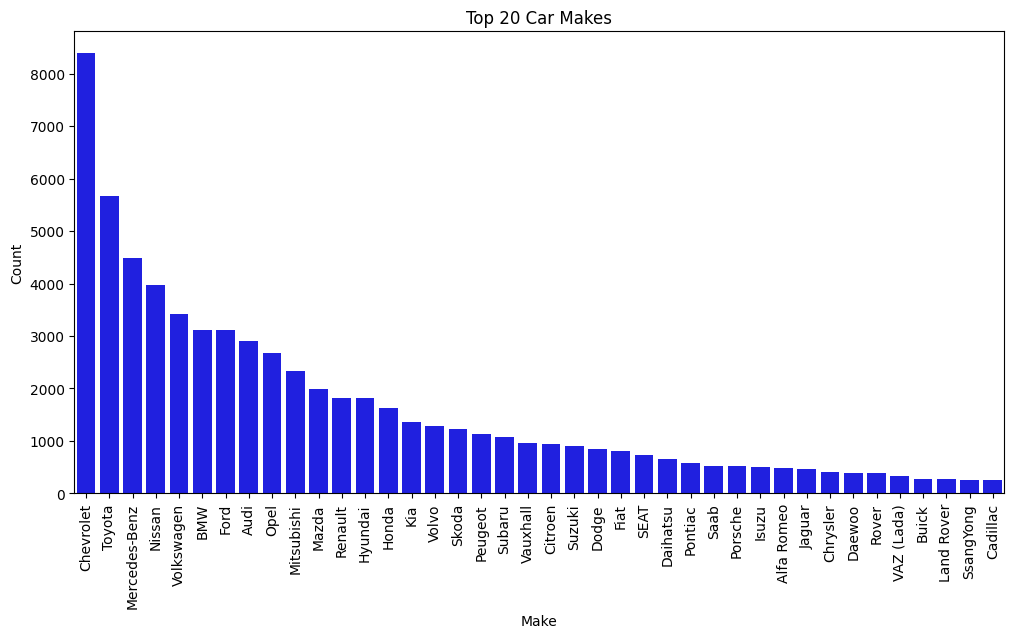

In [ ]:
top_20_makes = car_data['make'].value_counts().nlargest(40)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_makes.index, y=top_20_makes.values,color= 'blue')
plt.xticks(rotation=90)
plt.xlabel("Make")
plt.ylabel("Count")
plt.title("Top 20 Car Makes")
plt.show()

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='body_type', ylabel='count'>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Sedan'),
  Text(1, 0, 'Hatchback'),
  Text(2, 0, 'Wagon'),
  Text(3, 0, 'Crossover'),
  Text(4, 0, 'Minivan'),
  Text(5, 0, 'Coupe'),
  Text(6, 0, 'Pickup'),
  Text(7, 0, 'Cabriolet'),
  Text(8, 0, 'Liftback'),
  Text(9, 0, 'hardtop'),
  Text(10, 0, 'Roadster'),
  Text(11, 0, 'Targa'),
  Text(12, 0, 'Fastback'),
  Text(13, 0, 'Limousine'),
  Text(14, 0, 'Hatchback 3 doors')])

Text(0.5, 0, 'Body_type')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Top 20 Car Body_type')

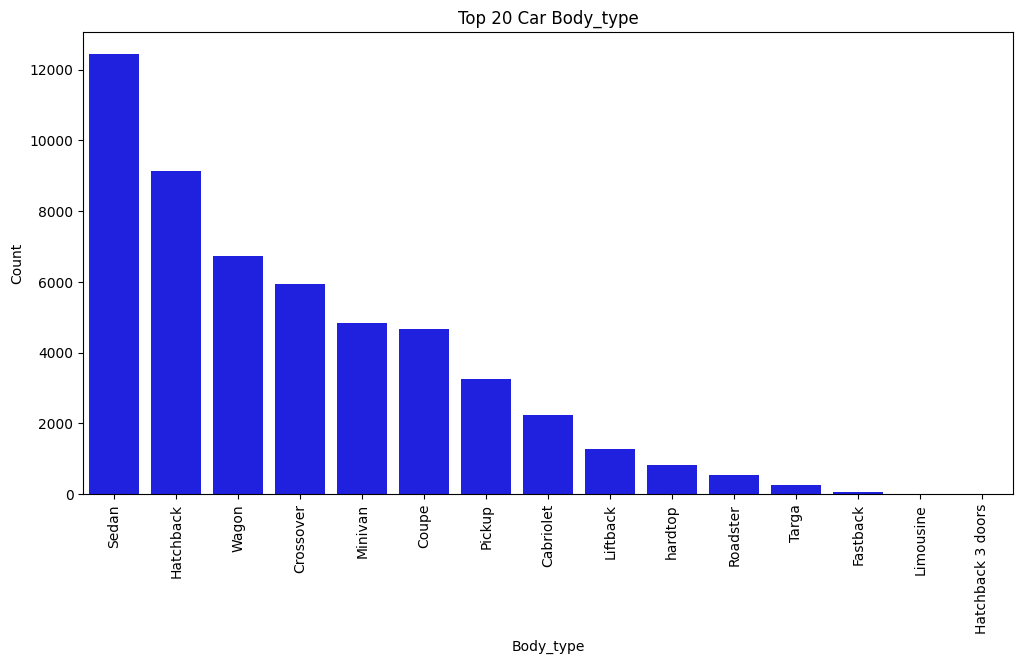

In [ ]:
top_20_Body_type = car_data['body_type'].value_counts().nlargest(20)

plt.figure(figsize=(12, 6))
sns.countplot(data=car_data, x='body_type', order=top_20_Body_type.index,color= 'blue')
plt.xticks(rotation=90)
plt.xlabel("Body_type")
plt.ylabel("Count")
plt.title("Top 20 Car Body_type")
plt.show()

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='modle'>

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39],
 [Text(0, 0, 'Silverado'),
  Text(1, 0, 'Impala'),
  Text(2, 0, 'E-Class'),
  Text(3, 0, '3 Series'),
  Text(4, 0, 'Chevelle'),
  Text(5, 0, 'Astra'),
  Text(6, 0, 'A4'),
  Text(7, 0, 'C-Class'),
  Text(8, 0, 'Golf'),
  Text(9, 0, 'Corolla'),
  Text(10, 0, '5 Series'),
  Text(11, 0, 'Kadett'),
  Text(12, 0, 'Caprice'),
  Text(13, 0, 'Corsa'),
  Text(14, 0, 'Octavia'),
  Text(15, 0, 'Firebird'),
  Text(16, 0, 'A6'),
  Text(17, 0, 'Focus'),
  Text(18, 0, 'Passat'),
  Text(19, 0, 'El Camino'),
  Text(20, 0, 'Vectra'),
  Text(21, 0, 'Lancer'),
  Text(22, 0, 'Nova'),
  Text(23, 0, 'Civic'),
  Text(24, 0, 'Camaro'),
  Text(25, 0, 'S-Class'),
  Text(26, 0, 'Escort'),
  Text(27, 0, 'Insignia'),
  Text(28, 0, 'Corvette'),
  Text(29, 0, 'Megane'),
  Text(30, 0, 'Suburb

Text(0.5, 0, 'Modle')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Top 20 Car Modle')

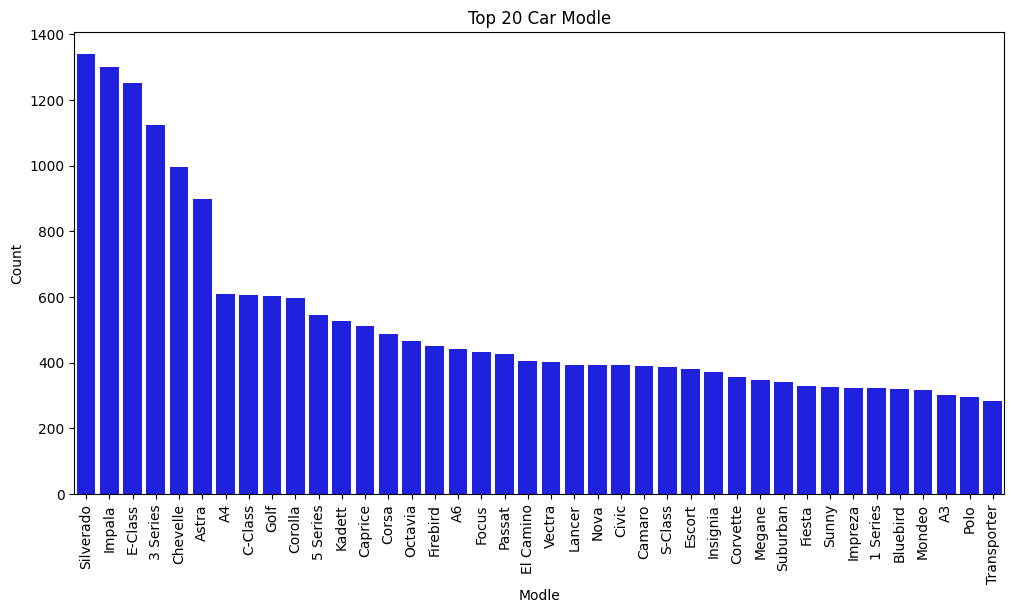

In [ ]:
top_20_modle = car_data['modle'].value_counts().nlargest(40)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_modle.index, y=top_20_modle.values,color= 'blue')
plt.xticks(rotation=90)
plt.xlabel("Modle")
plt.ylabel("Count")
plt.title("Top 20 Car Modle")
plt.show()

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='generation'>

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39],
 [Text(0, 0, '1 generation'),
  Text(1, 0, '2 generation'),
  Text(2, 0, '1 generation [redesign]'),
  Text(3, 0, '3 generation'),
  Text(4, 0, '2 generation [redesign]'),
  Text(5, 0, '4 generation'),
  Text(6, 0, '3 generation [redesign]'),
  Text(7, 0, '5 generation'),
  Text(8, 0, 'GMT800 [redesign]'),
  Text(9, 0, '4 generation [redesign]'),
  Text(10, 0, '1 generation [2th redesign]'),
  Text(11, 0, '6 generation'),
  Text(12, 0, '3 generation [2th redesign]'),
  Text(13, 0, '2 generation [2th redesign]'),
  Text(14, 0, '7 generation'),
  Text(15, 0, 'B'),
  Text(16, 0, '1 generation [3th redesign]'),
  Text(17, 0, 'GMT800'),
  Text(18, 0, '5 generation [redesign]'),
  Text(19, 0, 'E'),
  Text(20, 0, 'A'),
  Text(21, 0, '8 generation'),
  Text(22, 0, 'C

Text(0.5, 0, 'Generation')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Top 20 Car Generation')

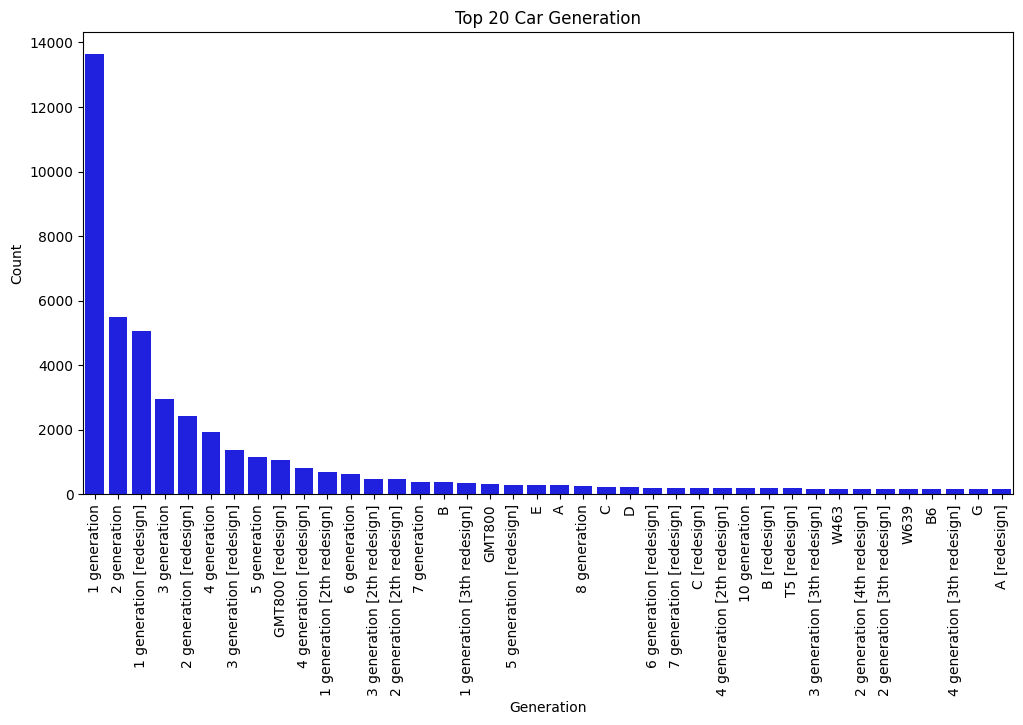

In [ ]:
top_20_Generation = car_data['generation'].value_counts().nlargest(40)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_Generation.index, y=top_20_Generation.values,color= 'blue')
plt.xticks(rotation=90)
plt.xlabel("Generation")
plt.ylabel("Count")
plt.title("Top 20 Car Generation")
plt.show()

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='series'>

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39],
 [Text(0, 0, 'Sedan'),
  Text(1, 0, 'Hatchback 5 doors'),
  Text(2, 0, 'Coupe'),
  Text(3, 0, 'Hatchback 3 doors'),
  Text(4, 0, 'Minivan'),
  Text(5, 0, 'Hatchback'),
  Text(6, 0, 'wagon'),
  Text(7, 0, 'wagon 5 doors'),
  Text(8, 0, 'Crossover'),
  Text(9, 0, 'Cabriolet'),
  Text(10, 0, 'SUV 5 doors'),
  Text(11, 0, 'Sedan 4 doors'),
  Text(12, 0, 'SUV'),
  Text(13, 0, 'Liftback'),
  Text(14, 0, 'SUV 3 doors'),
  Text(15, 0, 'Regular Cab pickup 2 doors'),
  Text(16, 0, 'Roadster'),
  Text(17, 0, 'Pickup'),
  Text(18, 0, 'Coupe 2 doors'),
  Text(19, 0, 'Extended Cab pickup 4 doors'),
  Text(20, 0, 'Crew Cab pickup 4 doors'),
  Text(21, 0, 'liftback'),
  Text(22, 0, 'Hardtop'),
  Text(23, 0, 'Crossover 5 doors'),
  Text(24, 0, 'Touring wagon'),
  Text(25, 0, 

Text(0.5, 0, 'Series')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Top 20 Car Series')

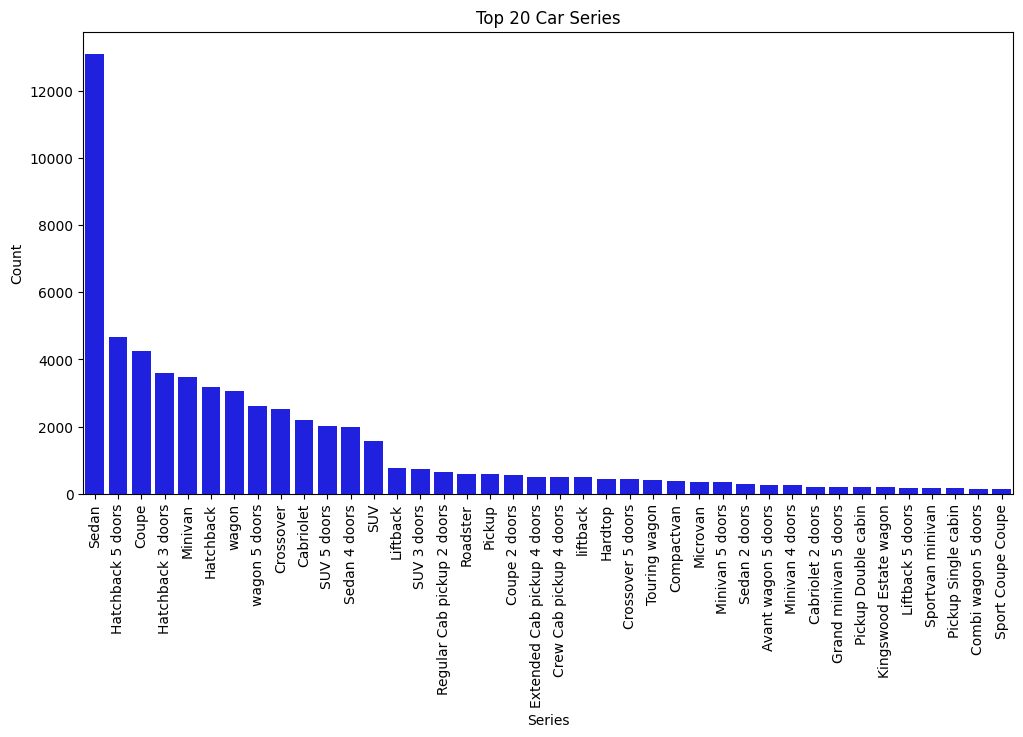

In [ ]:
top_20_Series = car_data['series'].value_counts().nlargest(40)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_Series.index, y=top_20_Series.values,color= 'blue')
plt.xticks(rotation=90)
plt.xlabel("Series")
plt.ylabel("Count")
plt.title("Top 20 Car Series")
plt.show()

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='country_of_origin'>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Japan'),
  Text(1, 0, 'Germany'),
  Text(2, 0, 'USA'),
  Text(3, 0, 'Great Britain'),
  Text(4, 0, 'South Korea'),
  Text(5, 0, 'France'),
  Text(6, 0, 'Czech'),
  Text(7, 0, 'Italy'),
  Text(8, 0, 'Sweden'),
  Text(9, 0, 'China'),
  Text(10, 0, 'Spain'),
  Text(11, 0, 'Russia'),
  Text(12, 0, 'Malaysia'),
  Text(13, 0, 'Australia'),
  Text(14, 0, 'Ukraine'),
  Text(15, 0, 'India'),
  Text(16, 0, 'Turkey'),
  Text(17, 0, 'Iran'),
  Text(18, 0, 'Latvian'),
  Text(19, 0, 'Brazil')])

Text(0.5, 0, 'country_of_origin')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Top country_of_origin')

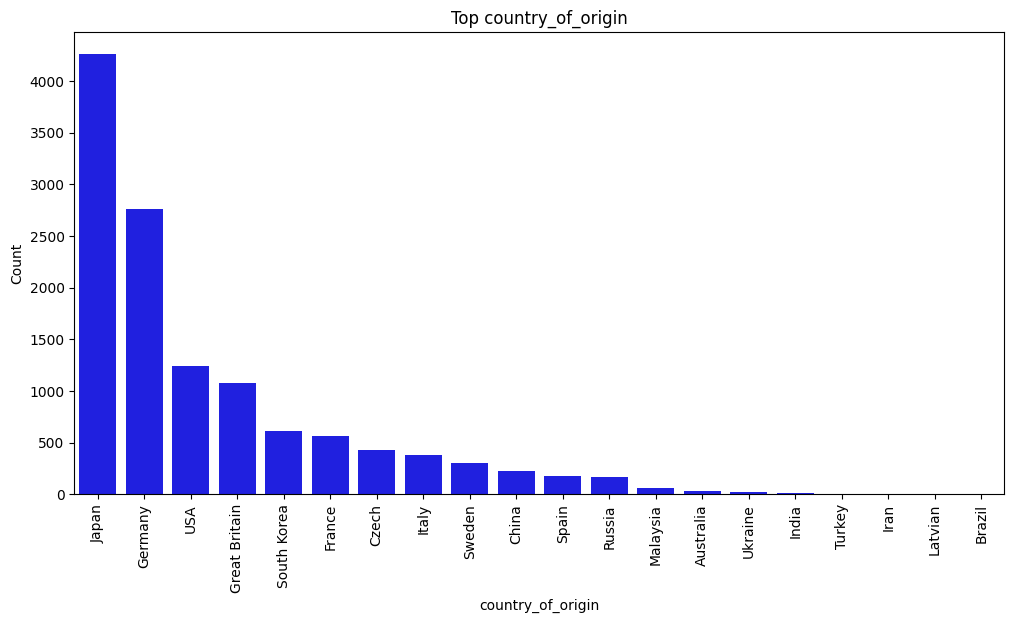

In [ ]:
top_country_of_origin = car_data['country_of_origin'].value_counts().nlargest(40)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_country_of_origin.index, y=top_country_of_origin.values, color= 'blue')
plt.xticks(rotation=90)
plt.xlabel("country_of_origin")
plt.ylabel("Count")
plt.title("Top country_of_origin")
plt.show()

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='engine_type'>

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Gasoline'),
  Text(1, 0, 'Diesel'),
  Text(2, 0, 'Petrol'),
  Text(3, 0, 'Hybrid'),
  Text(4, 0, 'Electric'),
  Text(5, 0, 'Liquefied coal hydrogen gases'),
  Text(6, 0, 'Rotor'),
  Text(7, 0, 'Gasoline, Electric'),
  Text(8, 0, 'Diesel, Hybrid')])

Text(0.5, 0, 'engine_type')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Top engine_type')

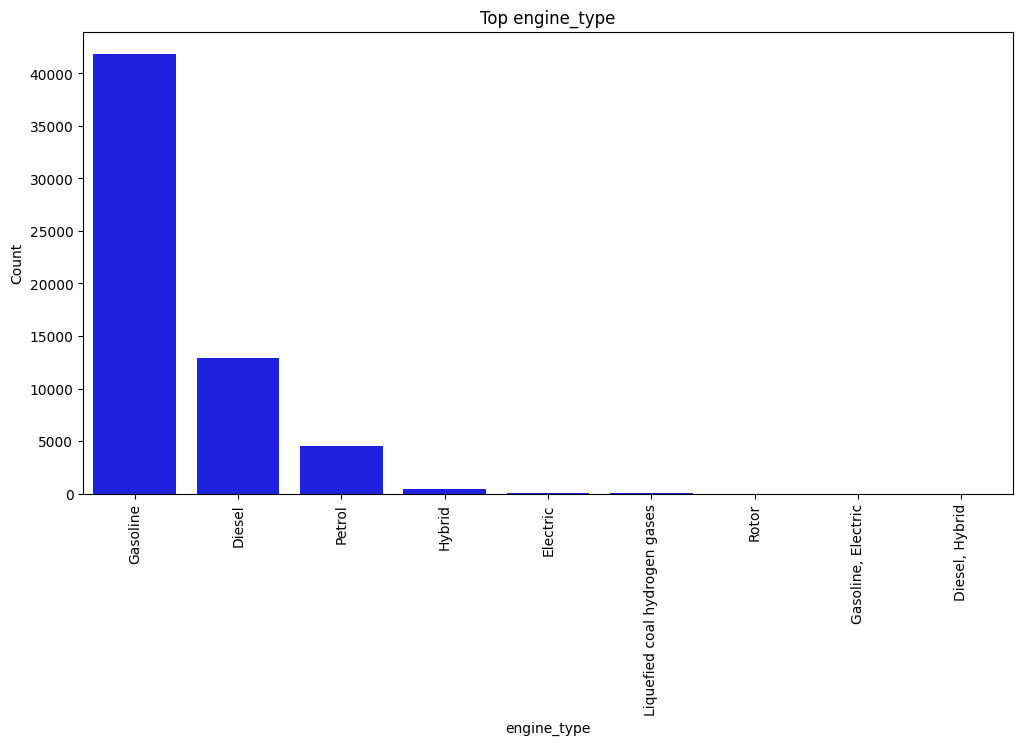

In [ ]:
top_engine_type = car_data['engine_type'].value_counts().nlargest(40)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_engine_type.index, y=top_engine_type.values,color= 'blue')
plt.xticks(rotation=90)
plt.xlabel("engine_type")
plt.ylabel("Count")
plt.title("Top engine_type")
plt.show()

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='drive_wheels'>

([0, 1, 2],
 [Text(0, 0, 'Front wheel drive'),
  Text(1, 0, 'Rear wheel drive'),
  Text(2, 0, 'All wheel drive (AWD)')])

Text(0.5, 0, 'drive_wheels')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Top drive_wheels')

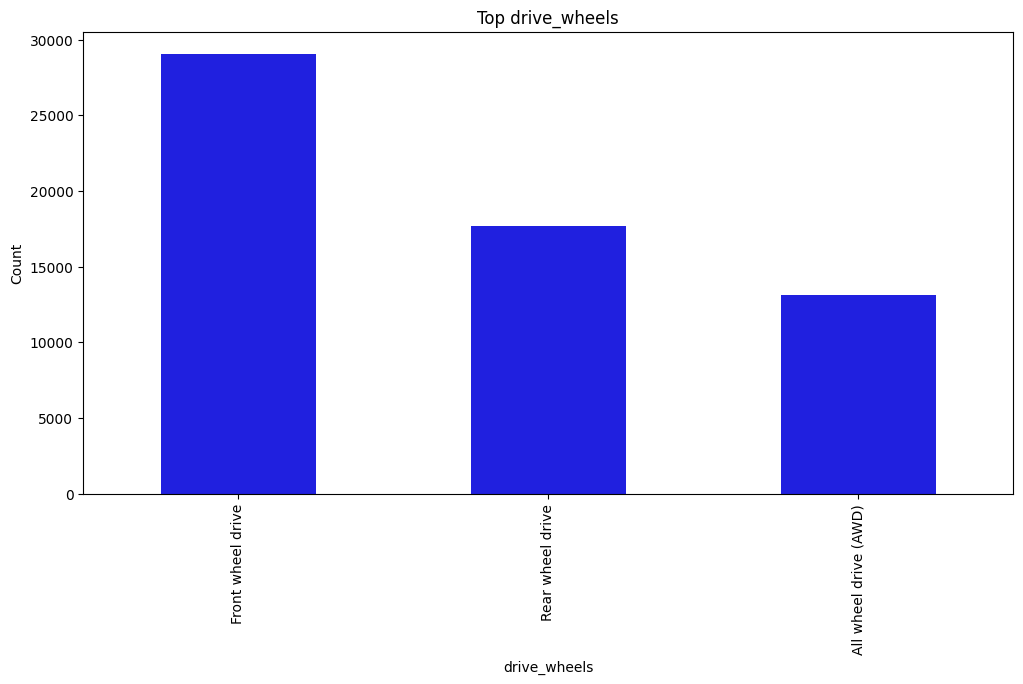

In [ ]:
top_drive_wheels = car_data['drive_wheels'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=top_drive_wheels.index, y=top_drive_wheels.values,color= 'blue',width=0.5)
plt.xticks(rotation=90)
plt.xlabel("drive_wheels")
plt.ylabel("Count")
plt.title("Top drive_wheels")
plt.show()

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='number_of_doors'>

([0, 1, 2, 3, 4],
 [Text(0, 0, '1.0'),
  Text(1, 0, '2.0'),
  Text(2, 0, '3.0'),
  Text(3, 0, '4.0'),
  Text(4, 0, '5.0')])

Text(0.5, 0, 'number_of_doors')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Top number_of_doors')

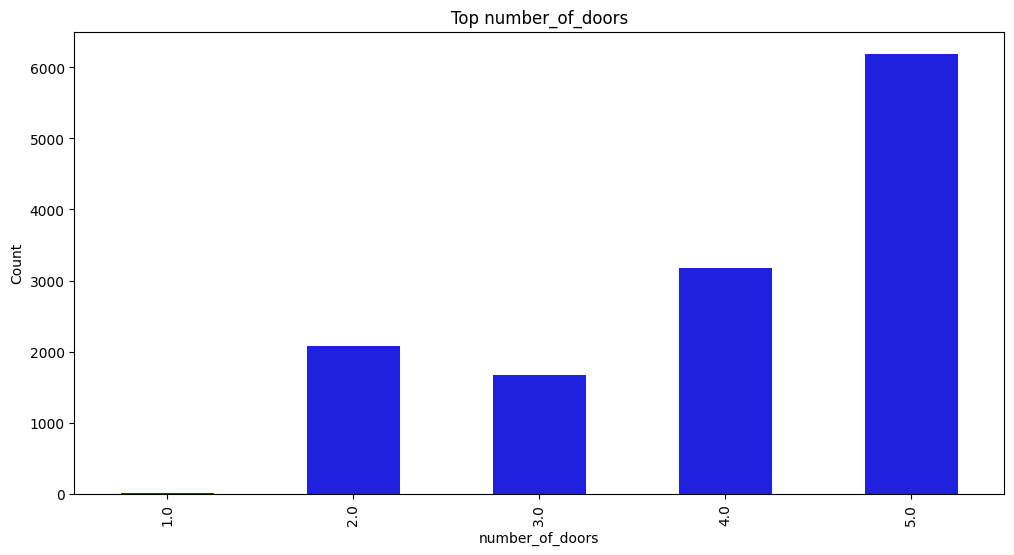

In [ ]:
top_number_of_doors = car_data['number_of_doors'].value_counts().nlargest()

plt.figure(figsize=(12, 6))
sns.barplot(x=top_number_of_doors.index, y=top_number_of_doors.values,color= 'blue',width=0.5)
plt.xticks(rotation=90)
plt.xlabel("number_of_doors")
plt.ylabel("Count")
plt.title("Top number_of_doors")
plt.show()

In [ ]:
# What is the distribution of car body types (Body_type) in the dataset? How has this distribution changed over time (from Year_from to Year_to)?

# Distribution of car body types overall
body_type_distribution = car_data['body_type'].value_counts(normalize=True) * 100
#body_type_distribution = car_data.groupby('body_type')['body_type'].count()
print("Overall Distribution of Body Types:\n", body_type_distribution)

# Analyze the distribution change over time
# Group data by 'Year_from' and calculate the distribution of Body_type for each year
body_type_distribution_over_time = car_data.groupby('year_from')['body_type'].value_counts(normalize=True) * 100
#body_type_distribution_over_time = car_data.groupby(['year_from','body_type'])['body_type'].count()

# Print the distribution change
print("\nDistribution of Body Types Over Time:\n", body_type_distribution_over_time.head(40))
print("\nDistribution of Body Types Over Time:\n", body_type_distribution_over_time.tail(40))

Overall Distribution of Body Types:
 body_type
Sedan                23.800046
Hatchback            17.505550
Wagon                12.891373
Crossover            11.390952
Minivan               9.239838
Coupe                 8.933629
Pickup                6.238996
Cabriolet             4.306055
Liftback              2.420960
hardtop               1.603766
Roadster              1.012401
Targa                 0.493761
Fastback              0.139708
Limousine             0.011483
Hatchback 3 doors     0.011483
Name: proportion, dtype: float64

Distribution of Body Types Over Time:
 year_from  body_type
1936.0     Crossover    100.000000
1941.0     Crossover    100.000000
1946.0     Sedan         66.666667
           Cabriolet     33.333333
1947.0     Crossover    100.000000
1948.0     Cabriolet     50.000000
           Fastback      50.000000
1949.0     Cabriolet    100.000000
1950.0     Minivan      100.000000
1951.0     Sedan         50.000000
           Crossover     25.000000
         

<Axes: xlabel='year_from'>

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Percentage of Body Type')

Text(0.5, 1.0, 'Distribution of Car Body Types Over Time')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74]),
 [Text(0, 0, '1936.0'),
  Text(1, 0, '1941.0'),
  Text(2, 0, '1946.0'),
  Text(3, 0, '1947.0'),
  Text(4, 0, '1948.0'),
  Text(5, 0, '1949.0'),
  Text(6, 0, '1950.0'),
  Text(7, 0, '1951.0'),
  Text(8, 0, '1953.0'),
  Text(9, 0, '1954.0'),
  Text(10, 0, '1955.0'),
  Text(11, 0, '1956.0'),
  Text(12, 0, '1957.0'),
  Text(13, 0, '1958.0'),
  Text(14, 0, '1959.0'),
  Text(15, 0, '1960.0'),
  Text(16, 0, '1961.0'),
  Text(17, 0, '1962.0'),
  Text(18, 0, '1963.0'),
  Text(19, 0, '1964.0'),
  Text(20, 0, '1965.0'),
  Text(21, 0, '1966.0'),
  Text(22, 0, '1967.0'),
  Text(23, 0, '1968.0'),
  Text(24, 0, '1969.0'),
  Text(25, 0, '1970.0'),
  Text(26, 0, '197

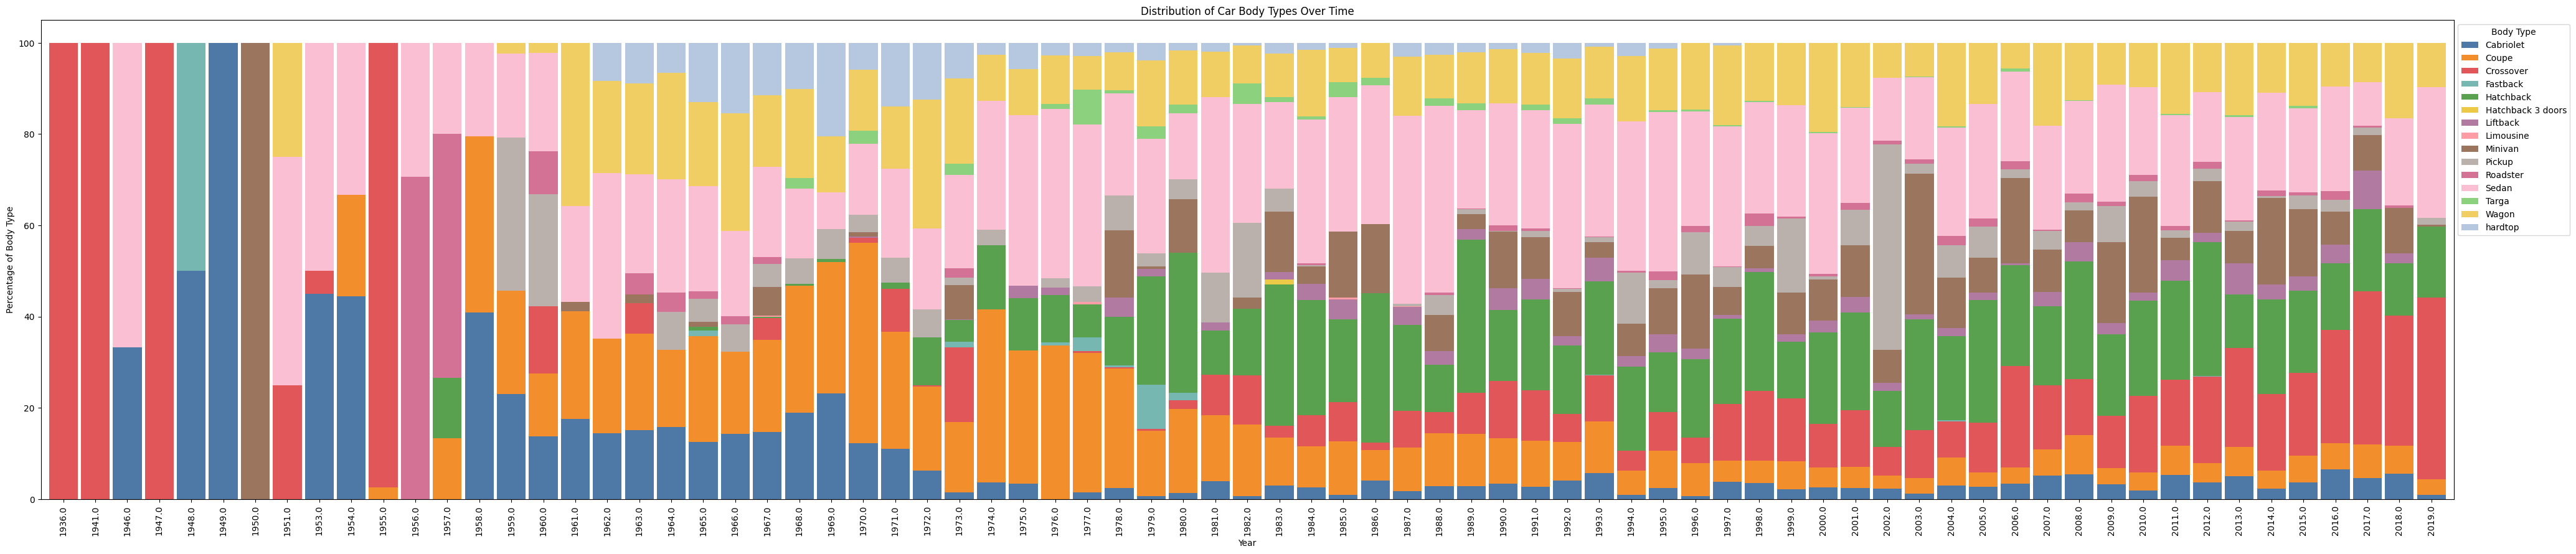

In [ ]:
# Define distinct colors for each body type
body_type_colors = {
   'Cabriolet': '#4E79A7',
    'Coupe': '#F28E2B',
    'Crossover': '#E15759',
    'Fastback': '#76B7B2',
    'Hatchback': '#59A14F',
    'Hatchback 3 doors': '#EDC948',
    'Liftback': '#B07AA1',
    'Limousine': '#FF9DA7',
    'Minivan': '#9C755F',
    'Pickup': '#BAB0AC',
    'Roadster': '#D37295',
    'Sedan': '#FABFD2',
    'Targa': '#8CD17D',
    'Wagon': '#F1CE63',
    'hardtop': '#B5C8E0'
}

# Plot the bar chart with distinct colors
body_type_distribution_over_time.unstack().plot(kind='bar', figsize=(50, 10), width=0.9, color=[body_type_colors[col] for col in body_type_distribution_over_time.unstack().columns],stacked=True)
plt.xlabel('Year')
plt.ylabel('Percentage of Body Type')
plt.title('Distribution of Car Body Types Over Time')
plt.legend(title='Body Type', loc='upper right', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=90)
plt.show()

<Figure size 3000x600 with 0 Axes>

(array([1920., 1940., 1960., 1980., 2000., 2020., 2040.]),
 [Text(1920.0, 0, '1920'),
  Text(1940.0, 0, '1940'),
  Text(1960.0, 0, '1960'),
  Text(1980.0, 0, '1980'),
  Text(2000.0, 0, '2000'),
  Text(2020.0, 0, '2020'),
  Text(2040.0, 0, '2040')])

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Average Engine Size (cm3)')

Text(0.5, 1.0, 'Trend of Average Engine Size Over Years')

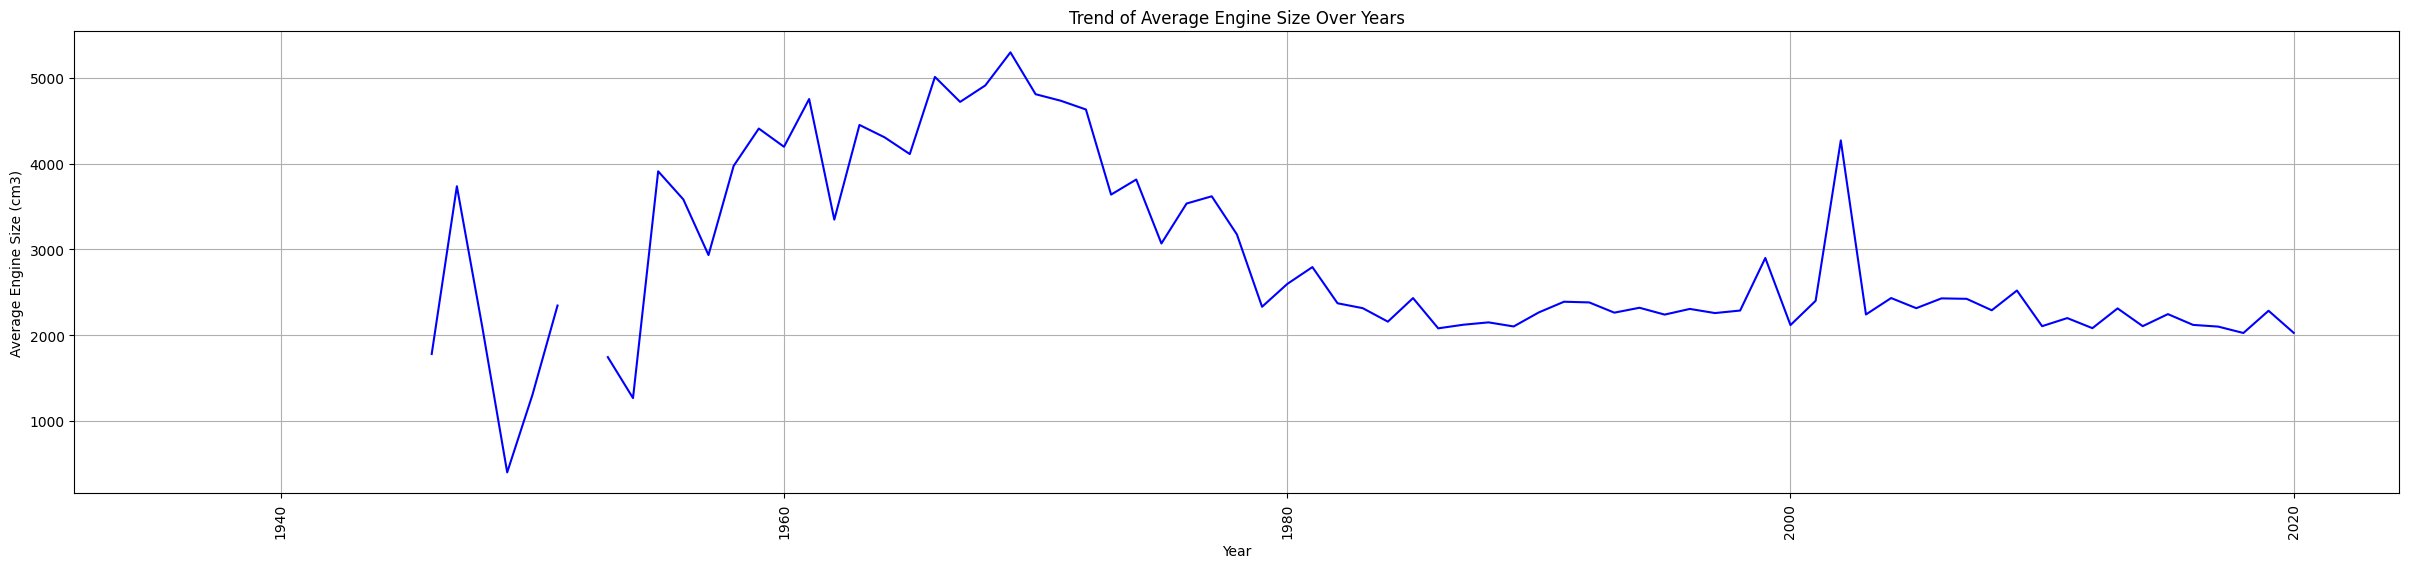


There is a trend towards smaller engines over time.


In [ ]:
# How has the average engine size (capacity_cm3) changed over the years? Is there a trend towards smaller or larger engines?
# This explores the evolution of engine technology and fuel efficiency concerns.

# Group the data by year and calculate the average engine size for each year
average_engine_size_by_year = car_data.groupby('year_from')['capacity_cm3'].mean()

# Plot the trend
plt.figure(figsize=(30, 6))
plt.plot(average_engine_size_by_year.index, average_engine_size_by_year.values,color= 'blue')
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Average Engine Size (cm3)')
plt.title('Trend of Average Engine Size Over Years')
plt.grid(True)
plt.show()

# Analyze the trend
if average_engine_size_by_year.iloc[-1] > average_engine_size_by_year.iloc[0]:
  print("\nThere is a trend towards larger engines over time.")
else:
  print("\nThere is a trend towards smaller engines over time.")


In [ ]:
# What are the typical characteristics (e.g., engine size, horsepower, fuel efficiency) of cars from different countries (country_of_origin)?
# This investigates regional variations in car design.

# Group data by country of origin and calculate the average engine size, horsepower, and fuel efficiency
car_characteristics_by_country = car_data.groupby('country_of_origin').agg({
    'capacity_cm3': 'mean',
    'engine_hp_rpm': 'mean',
    'mixed_fuel_consumption_per_100_km_l': 'mean'
})

# Rename columns for clarity
car_characteristics_by_country = car_characteristics_by_country.rename(
    columns={
        'capacity_cm3': 'Average Engine Size (cm3)',
        'engine_hp_rpm': 'Average Horsepower',
        'mixed_fuel_consumption_per_100_km_l': 'Average Fuel Efficiency (L/100km)'
    }
)

# Display the results
print(car_characteristics_by_country)

                   Average Engine Size (cm3)  Average Horsepower  \
country_of_origin                                                  
Australia                        4204.222222         5044.444444   
Brazil                                   NaN                 NaN   
China                            1794.217687         5148.275862   
Czech                            1609.830808         4427.721519   
France                           1682.542977         4620.498915   
Germany                          2634.554795         4546.207685   
Great Britain                    2357.204437         4810.823910   
India                             761.285714         4785.714286   
Iran                             1587.000000         5800.000000   
Italy                            1723.666667         4617.187500   
Japan                            2029.726119         5457.462687   
Latvian                                  NaN                 NaN   
Malaysia                         1666.866667    

<Figure size 1500x600 with 0 Axes>

<Axes: xlabel='country_of_origin', ylabel='Average Engine Size (cm3)'>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Australia'),
  Text(1, 0, 'Brazil'),
  Text(2, 0, 'China'),
  Text(3, 0, 'Czech'),
  Text(4, 0, 'France'),
  Text(5, 0, 'Germany'),
  Text(6, 0, 'Great Britain'),
  Text(7, 0, 'India'),
  Text(8, 0, 'Iran'),
  Text(9, 0, 'Italy'),
  Text(10, 0, 'Japan'),
  Text(11, 0, 'Latvian'),
  Text(12, 0, 'Malaysia'),
  Text(13, 0, 'Russia'),
  Text(14, 0, 'South Korea'),
  Text(15, 0, 'Spain'),
  Text(16, 0, 'Sweden'),
  Text(17, 0, 'Turkey'),
  Text(18, 0, 'USA'),
  Text(19, 0, 'Ukraine')])

Text(0.5, 0, 'Country of Origin')

Text(0, 0.5, 'Average Engine Size (cm3)')

Text(0.5, 1.0, 'Average Engine Size by Country')

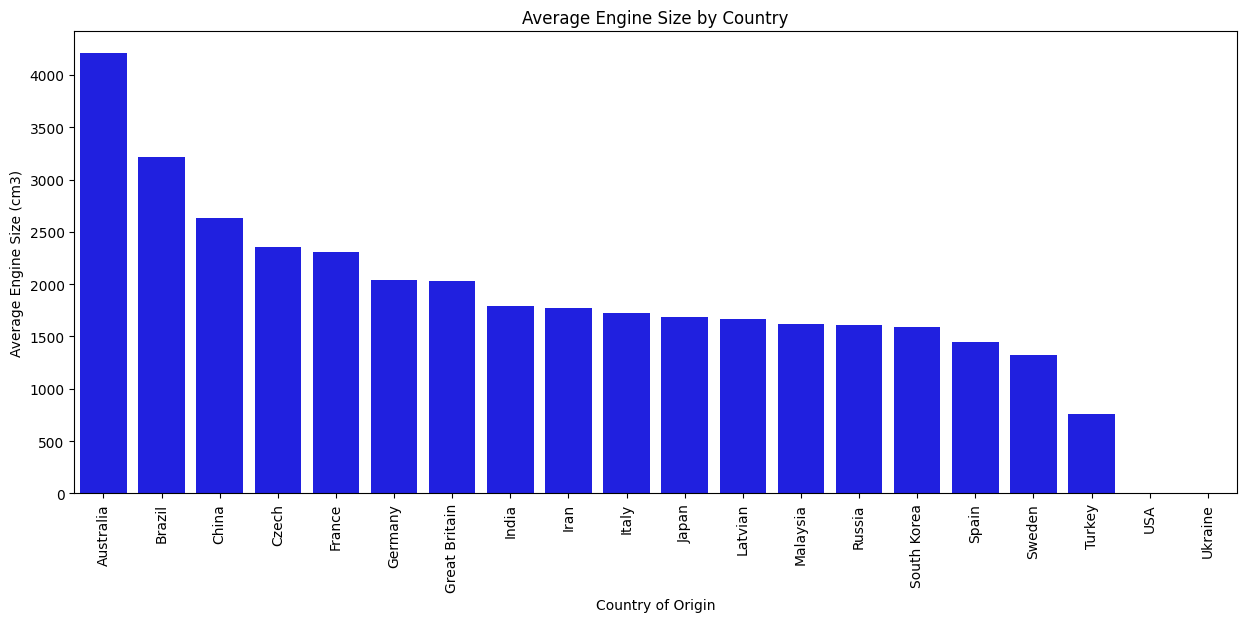

<Figure size 1500x600 with 0 Axes>

<Axes: xlabel='country_of_origin', ylabel='Average Horsepower'>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Australia'),
  Text(1, 0, 'Brazil'),
  Text(2, 0, 'China'),
  Text(3, 0, 'Czech'),
  Text(4, 0, 'France'),
  Text(5, 0, 'Germany'),
  Text(6, 0, 'Great Britain'),
  Text(7, 0, 'India'),
  Text(8, 0, 'Iran'),
  Text(9, 0, 'Italy'),
  Text(10, 0, 'Japan'),
  Text(11, 0, 'Latvian'),
  Text(12, 0, 'Malaysia'),
  Text(13, 0, 'Russia'),
  Text(14, 0, 'South Korea'),
  Text(15, 0, 'Spain'),
  Text(16, 0, 'Sweden'),
  Text(17, 0, 'Turkey'),
  Text(18, 0, 'USA'),
  Text(19, 0, 'Ukraine')])

Text(0.5, 0, 'Country of Origin')

Text(0, 0.5, 'Average Horsepower')

Text(0.5, 1.0, 'Average Horsepower by Country')

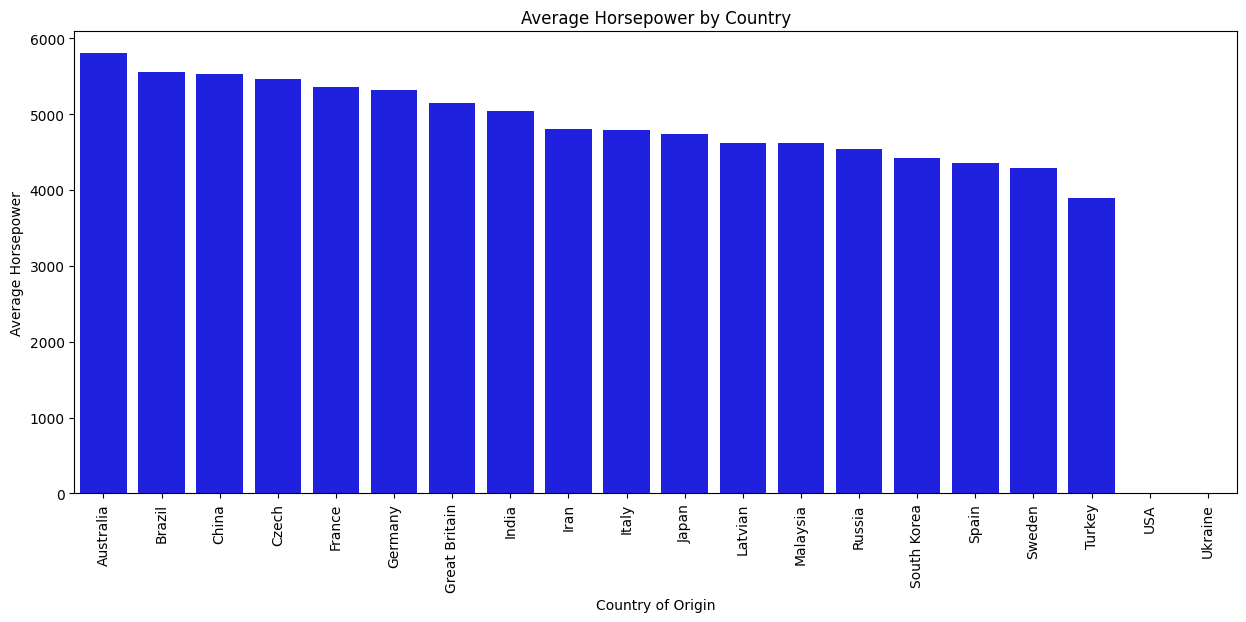

<Figure size 1500x600 with 0 Axes>

<Axes: xlabel='country_of_origin', ylabel='Average Fuel Efficiency (L/100km)'>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Australia'),
  Text(1, 0, 'Brazil'),
  Text(2, 0, 'China'),
  Text(3, 0, 'Czech'),
  Text(4, 0, 'France'),
  Text(5, 0, 'Germany'),
  Text(6, 0, 'Great Britain'),
  Text(7, 0, 'India'),
  Text(8, 0, 'Iran'),
  Text(9, 0, 'Italy'),
  Text(10, 0, 'Japan'),
  Text(11, 0, 'Latvian'),
  Text(12, 0, 'Malaysia'),
  Text(13, 0, 'Russia'),
  Text(14, 0, 'South Korea'),
  Text(15, 0, 'Spain'),
  Text(16, 0, 'Sweden'),
  Text(17, 0, 'Turkey'),
  Text(18, 0, 'USA'),
  Text(19, 0, 'Ukraine')])

Text(0.5, 0, 'Country of Origin')

Text(0, 0.5, 'Average Fuel Efficiency (L/100km)')

Text(0.5, 1.0, 'Average Fuel Efficiency by Country')

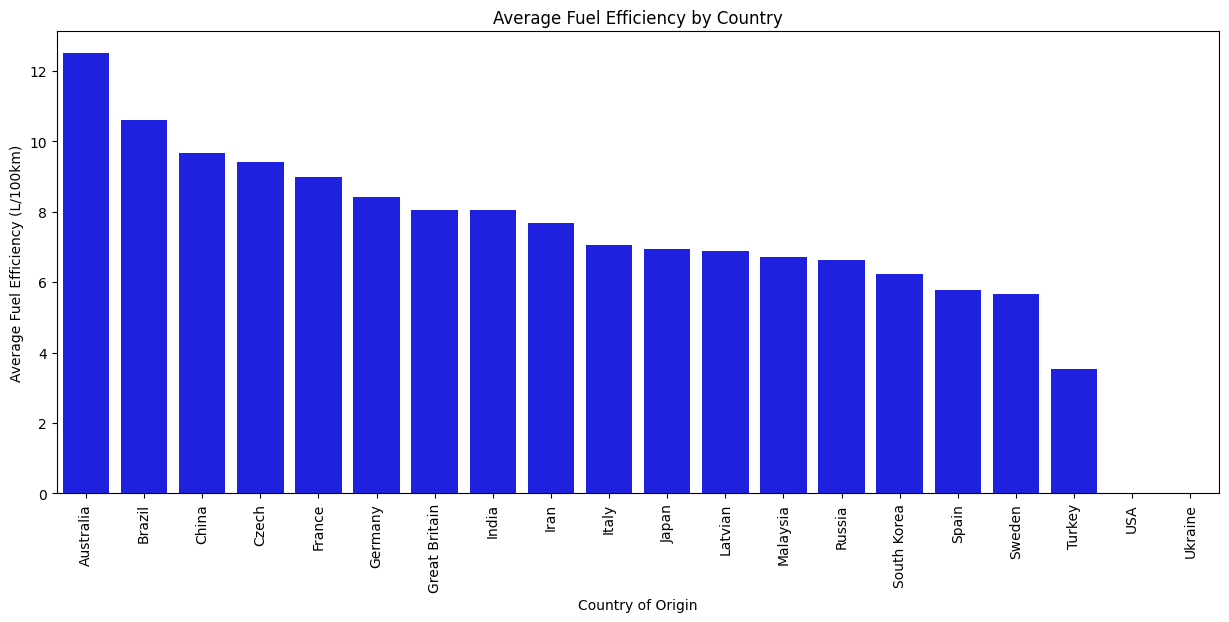

In [ ]:
# to compare the characteristics across different countries.
# Plotting average engine size for each country
plt.figure(figsize=(15, 6))
sns.barplot(x=car_characteristics_by_country.index, y=car_characteristics_by_country['Average Engine Size (cm3)'].sort_values(ascending=False), color= 'blue')
plt.xticks(rotation=90)
plt.xlabel('Country of Origin')
plt.ylabel('Average Engine Size (cm3)')
plt.title('Average Engine Size by Country')
plt.show()

plt.figure(figsize=(15, 6))
sns.barplot(x=car_characteristics_by_country.index, y=car_characteristics_by_country['Average Horsepower'].sort_values(ascending=False), color= 'blue')
plt.xticks(rotation=90)
plt.xlabel('Country of Origin')
plt.ylabel('Average Horsepower')
plt.title('Average Horsepower by Country')
plt.show()

plt.figure(figsize=(15, 6))
sns.barplot(x=car_characteristics_by_country.index, y=car_characteristics_by_country['Average Fuel Efficiency (L/100km)'].sort_values(ascending=False), color= 'blue')
plt.xticks(rotation=90)
plt.xlabel('Country of Origin')
plt.ylabel('Average Fuel Efficiency (L/100km)')
plt.title('Average Fuel Efficiency by Country')
plt.show()

<Axes: xlabel='year_from'>

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Percentage of Transmission Type')

Text(0.5, 1.0, 'Percentage of Transmission Types Over Time')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75]),
 [Text(0, 0, '1936.0'),
  Text(1, 0, '1941.0'),
  Text(2, 0, '1946.0'),
  Text(3, 0, '1947.0'),
  Text(4, 0, '1948.0'),
  Text(5, 0, '1949.0'),
  Text(6, 0, '1950.0'),
  Text(7, 0, '1951.0'),
  Text(8, 0, '1953.0'),
  Text(9, 0, '1954.0'),
  Text(10, 0, '1955.0'),
  Text(11, 0, '1956.0'),
  Text(12, 0, '1957.0'),
  Text(13, 0, '1958.0'),
  Text(14, 0, '1959.0'),
  Text(15, 0, '1960.0'),
  Text(16, 0, '1961.0'),
  Text(17, 0, '1962.0'),
  Text(18, 0, '1963.0'),
  Text(19, 0, '1964.0'),
  Text(20, 0, '1965.0'),
  Text(21, 0, '1966.0'),
  Text(22, 0, '1967.0'),
  Text(23, 0, '1968.0'),
  Text(24, 0, '1969.0'),
  Text(25, 0, '1970.0'),
  Text(26, 0, 

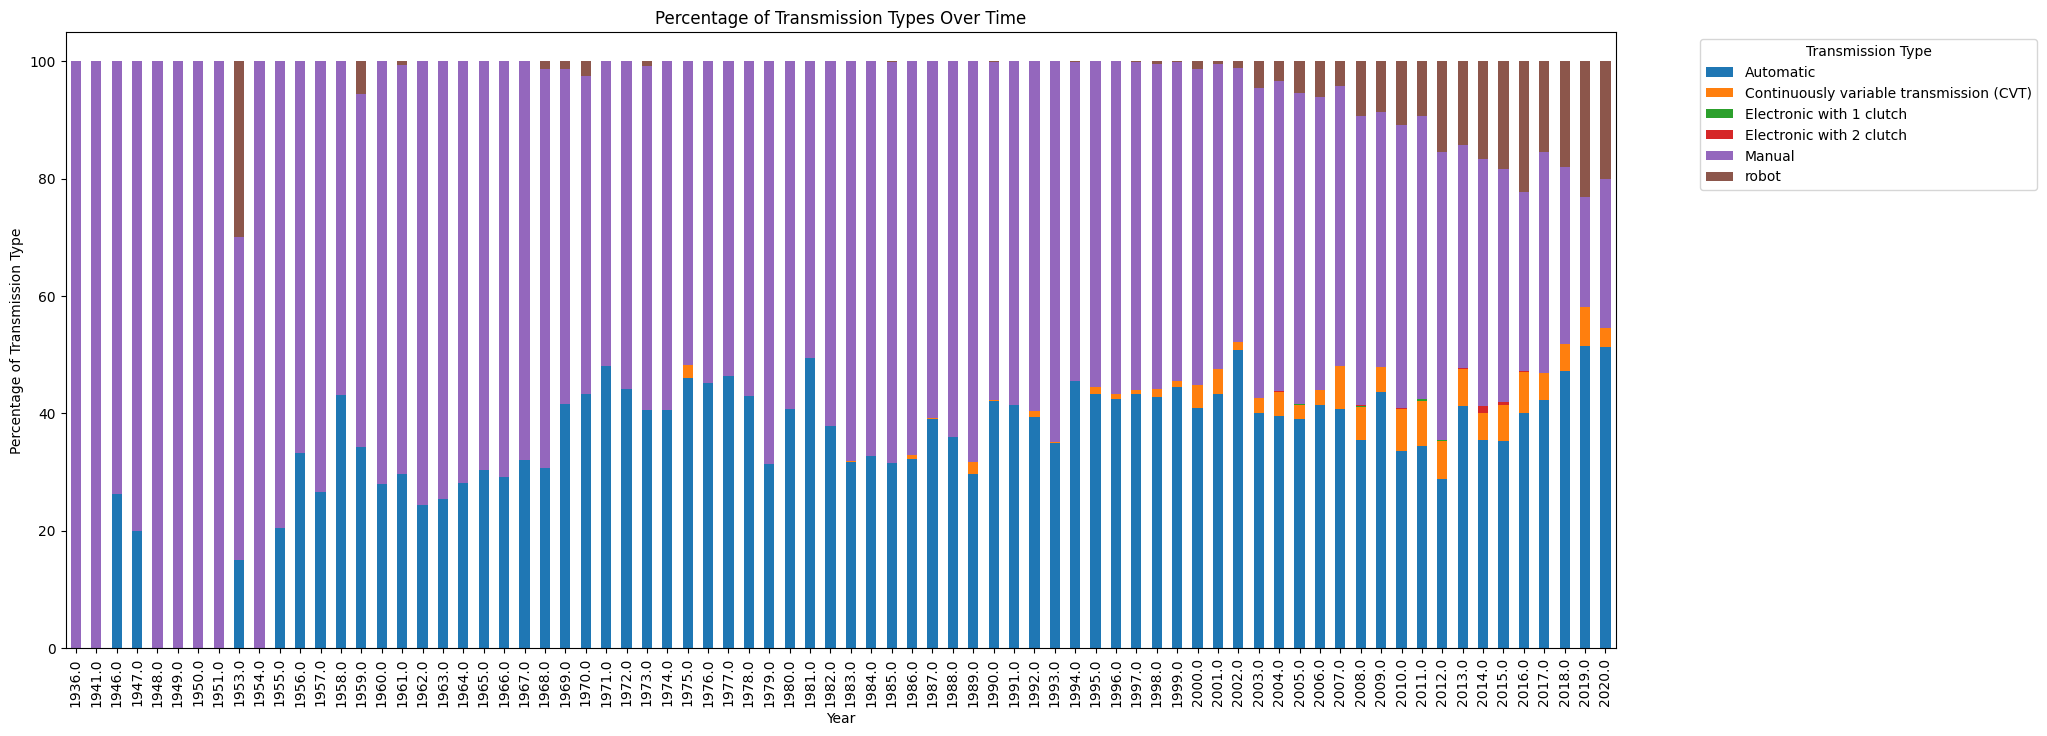

In [ ]:
# What is the distribution of transmission types (transmission) in the dataset, and how has it changed over time? This sheds light on the adoption of automatic vs. manual transmissions

# Analyze the distribution of transmission types over time
transmission_distribution_over_time = car_data.groupby(['year_from', 'transmission'])['transmission'].count().unstack()

# # Plot the distribution change
# transmission_distribution_over_time.plot(kind='bar', figsize=(20, 8), stacked=True)
# plt.xlabel('Year')
# plt.ylabel('Count of Transmission Type')
# plt.title('Distribution of Transmission Types Over Time')
# plt.legend(title='Transmission Type', loc='upper left', bbox_to_anchor=(1.05, 1))
# plt.xticks(rotation=90)
# plt.show()

# Calculate the percentage of each transmission type over time
transmission_percentage_over_time = transmission_distribution_over_time.div(transmission_distribution_over_time.sum(axis=1), axis=0) * 100

# Plot the percentage change over time
transmission_percentage_over_time.plot(kind='bar', figsize=(20, 8), stacked=True)
plt.xlabel('Year')
plt.ylabel('Percentage of Transmission Type')
plt.title('Percentage of Transmission Types Over Time')
plt.legend(title='Transmission Type', loc='upper left',bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=90)
plt.show()

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='transmission'>

Text(0.5, 0, 'Transmission Type')

Text(0, 0.5, 'Average Fuel Efficiency (L/100km)')

Text(0.5, 1.0, 'Fuel Efficiency by Transmission Type')

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Automatic'),
  Text(1, 0, 'Continuously variable transmission (CVT)'),
  Text(2, 0, 'Electronic with 1 clutch'),
  Text(3, 0, 'Electronic with 2 clutch'),
  Text(4, 0, 'Manual'),
  Text(5, 0, 'robot')])

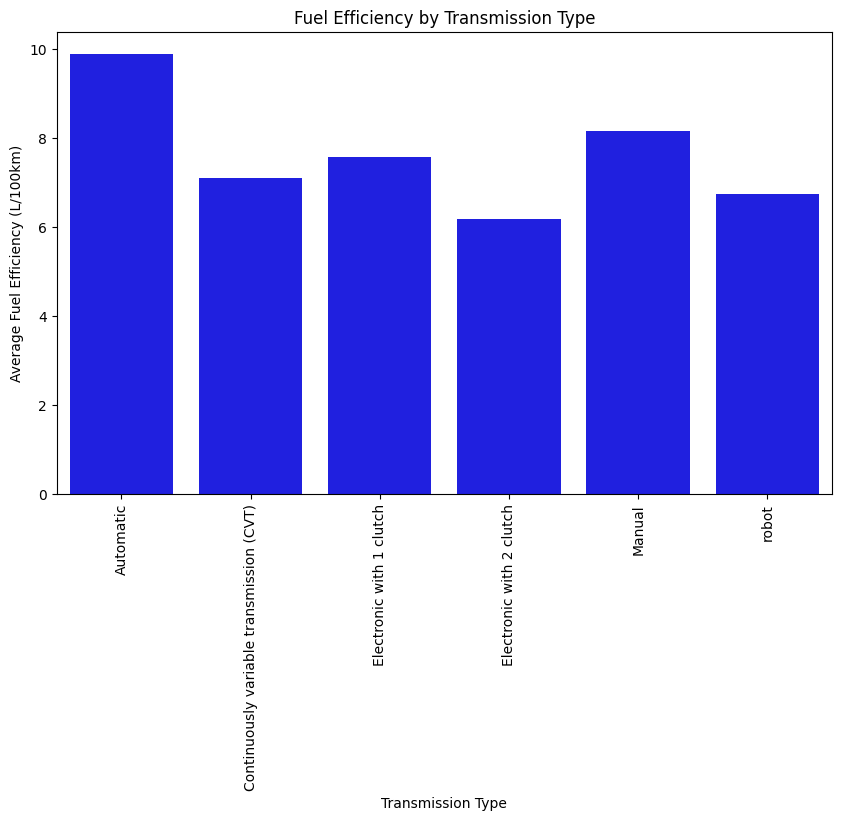

In [ ]:
# Looking at the distribution of transmission types for specific makes or body types.

# Group the data by transmission type and calculate the average fuel efficiency for each type
fuel_efficiency_by_transmission = car_data.groupby('transmission')['mixed_fuel_consumption_per_100_km_l'].mean()

# Plot the average fuel efficiency for each transmission type
plt.figure(figsize=(10, 6))
sns.barplot(x=fuel_efficiency_by_transmission.index, y=fuel_efficiency_by_transmission.values, color='blue')
plt.xlabel('Transmission Type')
plt.ylabel('Average Fuel Efficiency (L/100km)')
plt.title('Fuel Efficiency by Transmission Type')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Calculate the correlation coefficient between transmission type and fuel efficiency
# Note: We need to convert the transmission type to numerical values for correlation calculation
le = LabelEncoder()
car_data['transmission_encoded'] = le.fit_transform(car_data['transmission'])
correlation = car_data['transmission_encoded'].corr(car_data['mixed_fuel_consumption_per_100_km_l'])
print(f"Correlation between Transmission Type and Fuel Efficiency: {correlation}")

# Analyze the average fuel efficiency for different transmission types
average_fuel_efficiency_by_transmission = car_data.groupby('transmission')['mixed_fuel_consumption_per_100_km_l'].mean()
average_fuel_efficiency_by_transmission


Correlation between Transmission Type and Fuel Efficiency: -0.23233461715000553


,mixed_fuel_consumption_per_100_km_l
transmission,
Automatic,9.892362
Continuously variable transmission (CVT),7.099347
Electronic with 1 clutch,7.563636
Electronic with 2 clutch,6.181579
Manual,8.160396
robot,6.738597


<Figure size 800x600 with 0 Axes>

<Axes: xlabel='curb_weight_kg', ylabel='acceleration_0_100_km_h_s'>

Text(0.5, 0, 'Curb Weight (kg)')

Text(0, 0.5, 'Acceleration (0-100 km/h, s)')

Text(0.5, 1.0, 'Relationship between Curb Weight and Acceleration')

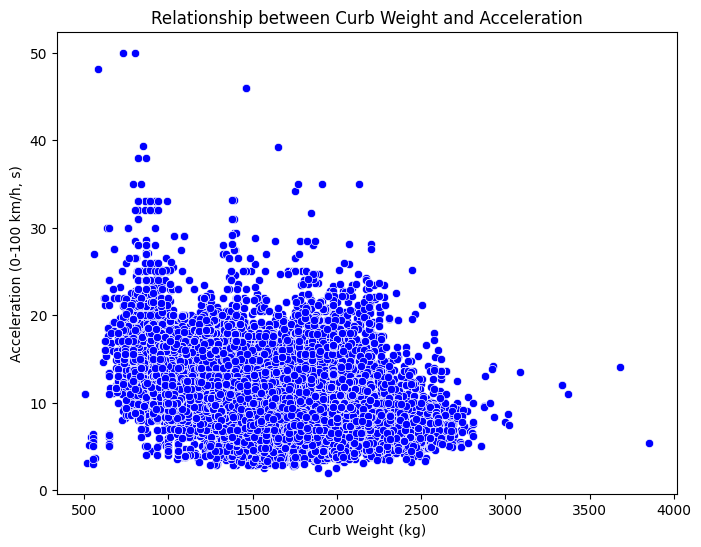


Correlation between Curb Weight and Acceleration: -0.38716981019935887


In [ ]:
# What is the relationship between a car's weight (curb_weight_kg) and its acceleration (acceleration_0_100_km/h_s)?

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
sns.scatterplot(x='curb_weight_kg', y='acceleration_0_100_km_h_s', data=car_data,color = 'blue')
plt.xlabel('Curb Weight (kg)')
plt.ylabel('Acceleration (0-100 km/h, s)')
plt.title('Relationship between Curb Weight and Acceleration')
plt.show()

# Calculate the correlation between curb_weight_kg and acceleration_0_100_km/h_s
correlation = car_data['curb_weight_kg'].corr(car_data['acceleration_0_100_km_h_s'])
print(f"\nCorrelation between Curb Weight and Acceleration: {correlation}")


<Axes: xlabel='year_from'>

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Percentage of Cars')

Text(0.5, 1.0, 'Percentage of Most Common Fuel Types Over Time')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75]),
 [Text(0, 0, '1936.0'),
  Text(1, 0, '1941.0'),
  Text(2, 0, '1946.0'),
  Text(3, 0, '1947.0'),
  Text(4, 0, '1948.0'),
  Text(5, 0, '1949.0'),
  Text(6, 0, '1950.0'),
  Text(7, 0, '1951.0'),
  Text(8, 0, '1953.0'),
  Text(9, 0, '1954.0'),
  Text(10, 0, '1955.0'),
  Text(11, 0, '1956.0'),
  Text(12, 0, '1957.0'),
  Text(13, 0, '1958.0'),
  Text(14, 0, '1959.0'),
  Text(15, 0, '1960.0'),
  Text(16, 0, '1961.0'),
  Text(17, 0, '1962.0'),
  Text(18, 0, '1963.0'),
  Text(19, 0, '1964.0'),
  Text(20, 0, '1965.0'),
  Text(21, 0, '1966.0'),
  Text(22, 0, '1967.0'),
  Text(23, 0, '1968.0'),
  Text(24, 0, '1969.0'),
  Text(25, 0, '1970.0'),
  Text(26, 0, 

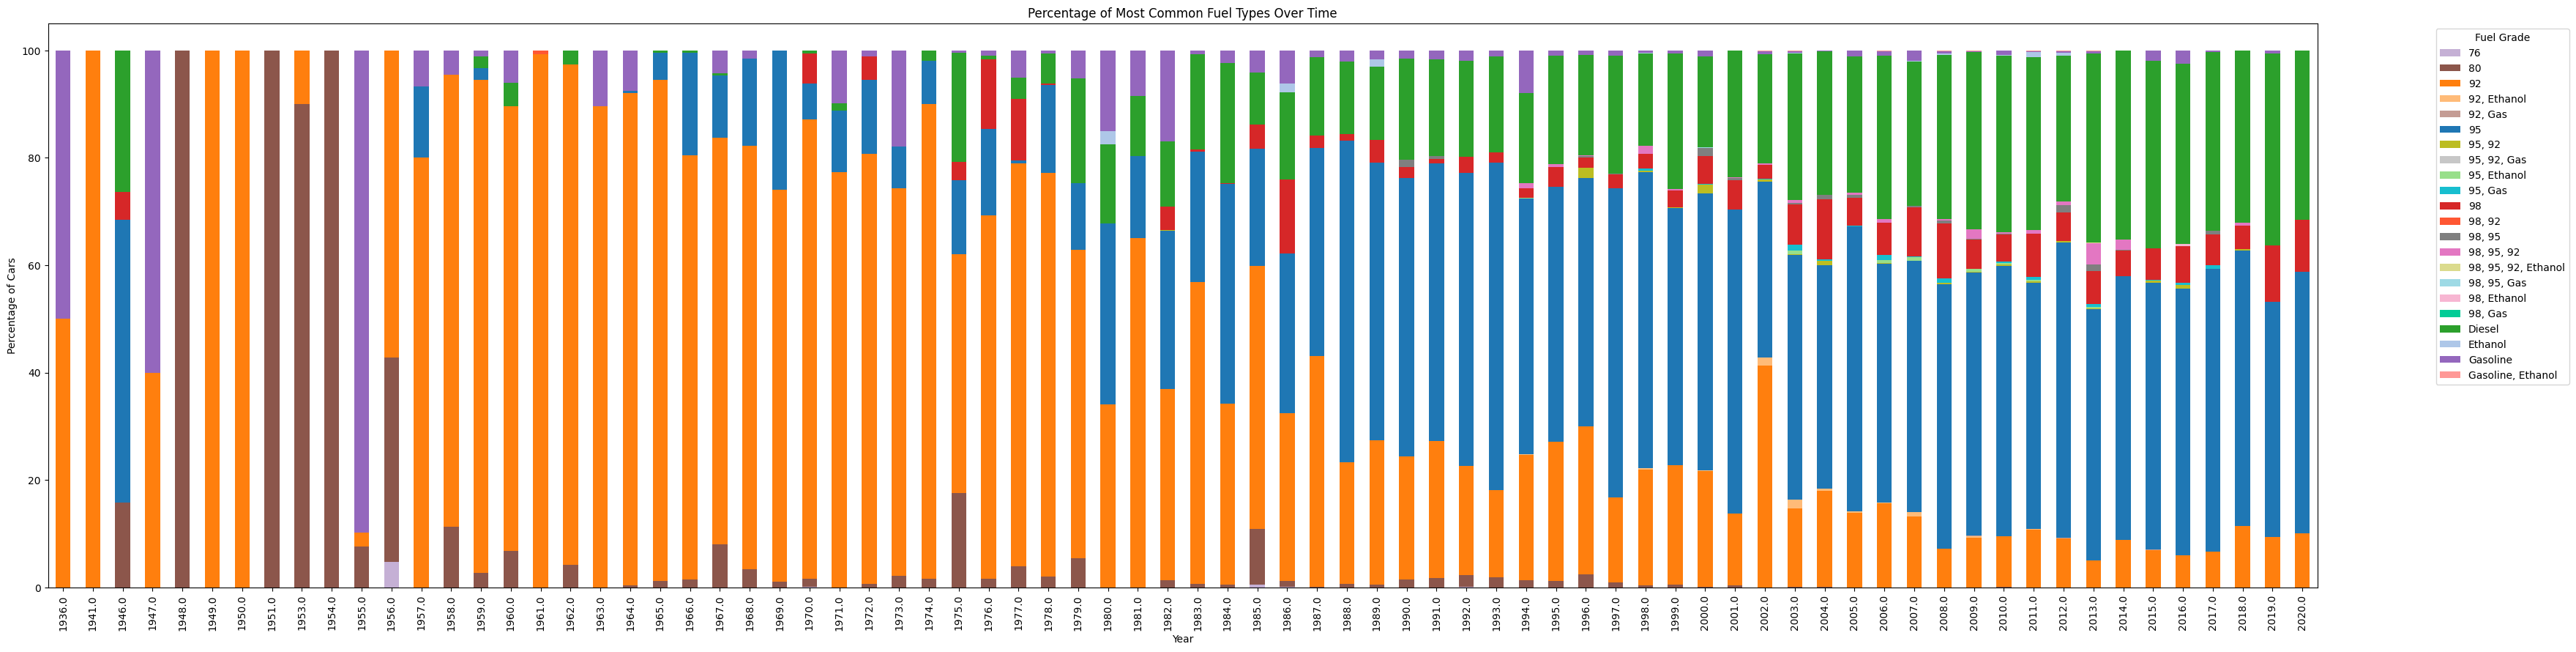

In [ ]:
# What are the most common fuel types (fuel_grade) used in cars over the years?

# Group the data by year and fuel grade, count the occurrences of each fuel grade for each year
fuel_grade_over_time = car_data.groupby(['year_from', 'fuel_grade'])['fuel_grade'].count().unstack()

# Fill NaN values with 0 (for years with no specific fuel grade)
fuel_grade_over_time = fuel_grade_over_time.fillna(0)

# calculate the percentage of each fuel grade over time:
fuel_grade_percentage_over_time = fuel_grade_over_time.div(fuel_grade_over_time.sum(axis=1), axis=0) * 100

# Define new distinct colors for each fuel grade
fuel_colors = {
    '95': '#1f77b4',        # Blue
    '92': '#ff7f0e',        # Orange
    'Diesel': '#2ca02c',    # Green
    '98': '#d62728',        # Red
    'Gasoline': '#9467bd',  # Purple
    '80': '#8c564b',        # Brown
    '98, 95, 92': '#e377c2',# Pink
    '98, 95': '#7f7f7f',    # Gray
    '95, 92': '#bcbd22',    # Olive
    '95, Gas': '#17becf',   # Cyan
    '92, Ethanol': '#ffbb78',# Light Orange
    'Ethanol': '#aec7e8',   # Light Blue
    '95, Ethanol': '#98df8a',# Light Green
    'Gasoline, Ethanol': '#ff9896', # Light Red
    '76': '#c5b0d5',        # Light Purple
    '92, Gas': '#c49c94',   # Light Brown
    '98, Ethanol': '#f7b6d2',# Soft Pink
    '95, 92, Gas': '#c7c7c7',# Light Gray
    '98, 95, 92, Ethanol': '#dbdb8d',# Light Olive
    '98, 95, Gas': '#9edae5',# Light Cyan
    '98, 92': '#ff5733',    # Bright Orange
    '98, Gas': '#00cc96',   # Bright Green
    np.nan: '#d3d3d3'       # Light Gray for NaN (if applicable)
}

fuel_grade_percentage_over_time.plot(kind='bar', figsize=(40, 10), stacked=True, color=fuel_colors)
plt.xlabel('Year')
plt.ylabel('Percentage of Cars')
plt.title('Percentage of Most Common Fuel Types Over Time')
plt.xticks(rotation=90)
plt.legend(title='Fuel Grade', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()


Average Number of Doors by Body Type:
 body_type
Cabriolet                 NaN
Coupe                4.000000
Crossover            4.777778
Fastback                  NaN
Hatchback            4.533835
Hatchback 3 doors    3.000000
Liftback                  NaN
Limousine                 NaN
Minivan              5.000000
Pickup               2.571429
Roadster                  NaN
Sedan                4.000000
Targa                     NaN
Wagon                5.000000
hardtop                   NaN
Name: number_of_doors, dtype: float64





<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='body_type'>

Text(0.5, 0, 'Body Type')

Text(0, 0.5, 'Average Number of Doors')

Text(0.5, 1.0, 'Average Number of Doors Across Different Body Types')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Cabriolet'),
  Text(1, 0, 'Coupe'),
  Text(2, 0, 'Crossover'),
  Text(3, 0, 'Fastback'),
  Text(4, 0, 'Hatchback'),
  Text(5, 0, 'Hatchback 3 doors'),
  Text(6, 0, 'Liftback'),
  Text(7, 0, 'Limousine'),
  Text(8, 0, 'Minivan'),
  Text(9, 0, 'Pickup'),
  Text(10, 0, 'Roadster'),
  Text(11, 0, 'Sedan'),
  Text(12, 0, 'Targa'),
  Text(13, 0, 'Wagon'),
  Text(14, 0, 'hardtop')])

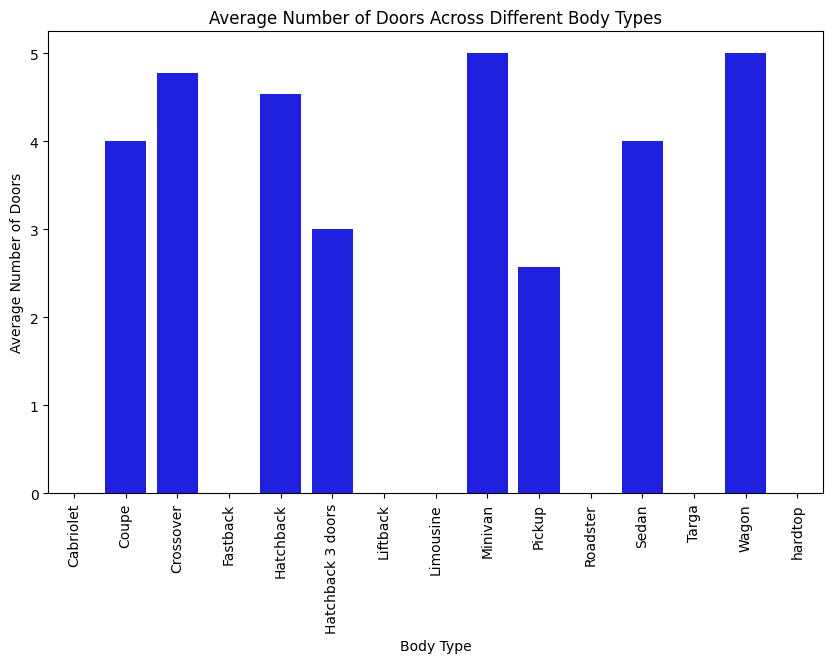

In [ ]:
# How does the number of doors (number_of_doors) vary across different body types (Body_type)?

# Group the data by body type and calculate the average number of doors for each body type
average_doors_by_body_type = car_data.groupby('body_type')['number_of_doors'].mean()

# Print the results
print("Average Number of Doors by Body Type:\n", average_doors_by_body_type)
print('\n\n')
# You can also visualize this data using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=average_doors_by_body_type.index, y=average_doors_by_body_type.values, color='blue')
plt.xlabel('Body Type')
plt.ylabel('Average Number of Doors')
plt.title('Average Number of Doors Across Different Body Types')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed for readability
plt.show()


make
AC            312.818182
AMC                  NaN
Acura         226.212121
Adler                NaN
Alfa Romeo    152.106936
                 ...    
ZX            122.200000
Zastava        64.428571
ZiS                  NaN
Zibar                NaN
Zotye         142.111111
Name: engine_hp, Length: 255, dtype: float64




<Figure size 4000x600 with 0 Axes>

<Axes: xlabel='make'>

Text(0.5, 0, 'Car Make')

Text(0, 0.5, 'Average Horsepower')

Text(0.5, 1.0, 'Average Horsepower Distribution Across Car Makes')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

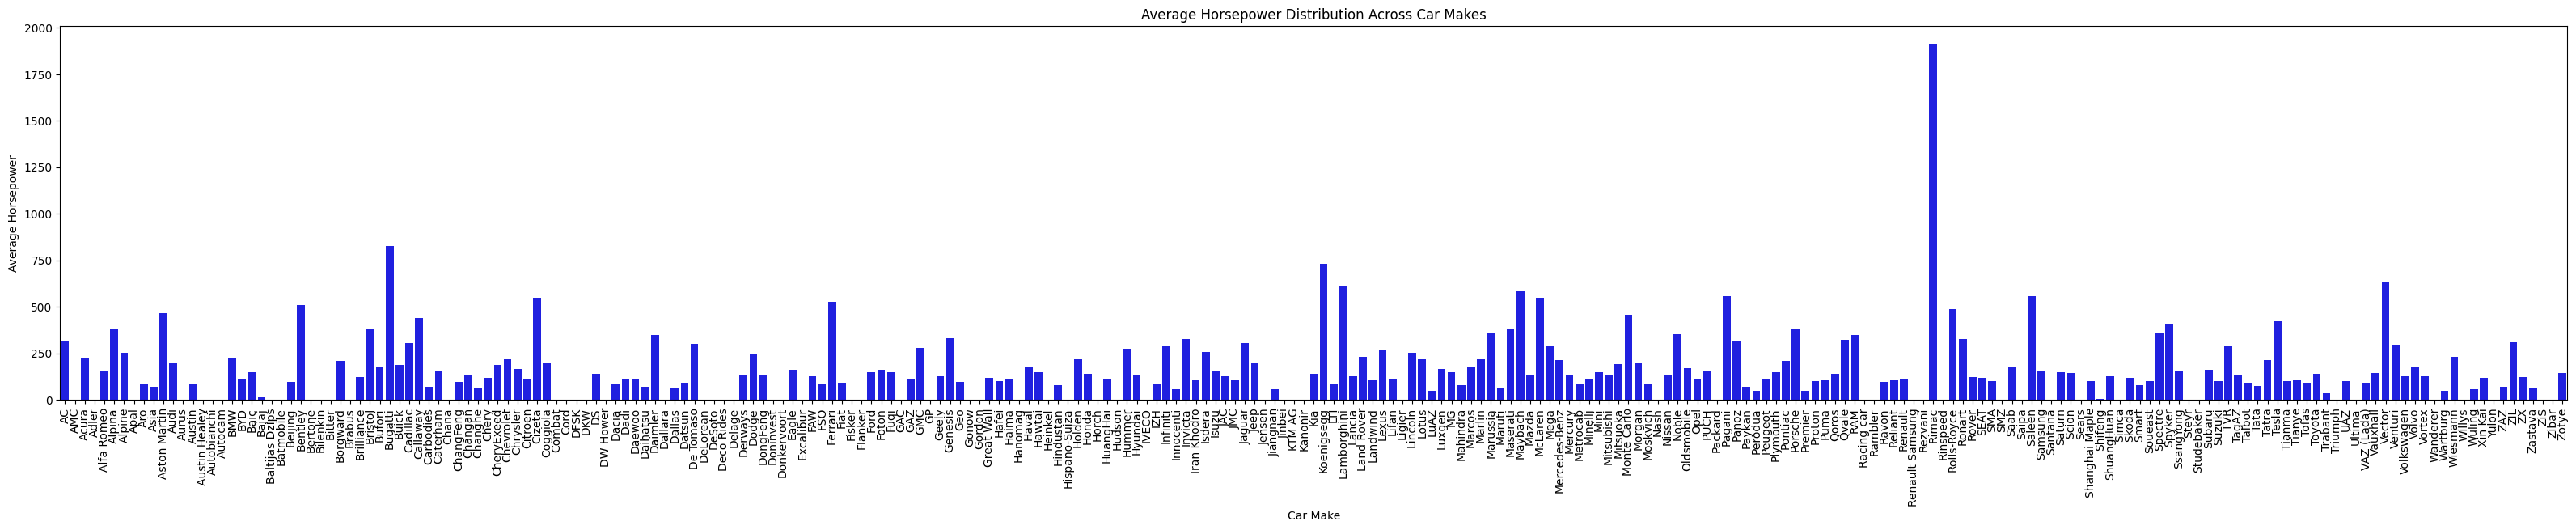

In [ ]:
# What is the avg distribution of horsepower (engine_hp ) across different car makes (Make)?

# Group data by 'Make' and calculate the average 'engine_hp' for each make
avg_horsepower_by_make = car_data.groupby('make')['engine_hp'].mean()

# Print the average horsepower distribution across different car makes
print(avg_horsepower_by_make)
print('\n')
# You can also visualize this data using a bar plot or histogram
plt.figure(figsize=(40, 6))
sns.barplot(x=avg_horsepower_by_make.index, y=avg_horsepower_by_make.values, color='blue')
plt.xlabel('Car Make')
plt.ylabel('Average Horsepower')
plt.title('Average Horsepower Distribution Across Car Makes')
plt.xticks(rotation=90)
plt.show()

Average Fuel Consumption by Car Class:
 car_class
A     5.459792
B     5.774738
C     6.526069
D     8.006955
E     8.832682
F    10.873541
J     9.565596
M     7.217736
S    10.087119
Name: mixed_fuel_consumption_per_100_km_l, dtype: float64




<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='car_class'>

Text(0.5, 0, 'Car Class')

Text(0, 0.5, 'Average Fuel Consumption (L/100km)')

Text(0.5, 1.0, 'Average Fuel Consumption for Different Car Classes')

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'A'),
  Text(1, 0, 'B'),
  Text(2, 0, 'C'),
  Text(3, 0, 'D'),
  Text(4, 0, 'E'),
  Text(5, 0, 'F'),
  Text(6, 0, 'J'),
  Text(7, 0, 'M'),
  Text(8, 0, 'S')])

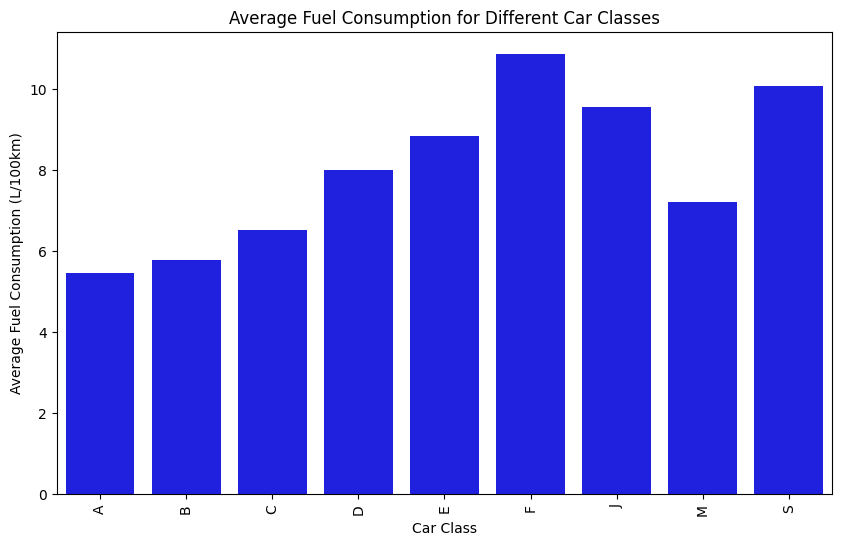

In [ ]:
# What is the average fuel consumption (mixed_fuel_consumption_per_100_km_l) for different car classes (car_class)?

# Calculate the average fuel consumption for different car classes
average_fuel_consumption_by_class = car_data.groupby('car_class')['mixed_fuel_consumption_per_100_km_l'].mean()

# Print the results
print("Average Fuel Consumption by Car Class:\n", average_fuel_consumption_by_class)
print('\n')

# You can also visualize this data using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=average_fuel_consumption_by_class.index, y=average_fuel_consumption_by_class.values, color='blue')
plt.xlabel('Car Class')
plt.ylabel('Average Fuel Consumption (L/100km)')
plt.title('Average Fuel Consumption for Different Car Classes')
plt.xticks(rotation=90)
plt.show()


<Axes: xlabel='year_from'>

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Percentage of Emission Standard')

Text(0.5, 1.0, 'Percentage of Emission Standards Over Time')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 [Text(0, 0, '1959.0'),
  Text(1, 0, '1975.0'),
  Text(2, 0, '1979.0'),
  Text(3, 0, '1980.0'),
  Text(4, 0, '1982.0'),
  Text(5, 0, '1984.0'),
  Text(6, 0, '1985.0'),
  Text(7, 0, '1987.0'),
  Text(8, 0, '1988.0'),
  Text(9, 0, '1989.0'),
  Text(10, 0, '1990.0'),
  Text(11, 0, '1991.0'),
  Text(12, 0, '1992.0'),
  Text(13, 0, '1993.0'),
  Text(14, 0, '1994.0'),
  Text(15, 0, '1995.0'),
  Text(16, 0, '1996.0'),
  Text(17, 0, '1997.0'),
  Text(18, 0, '1998.0'),
  Text(19, 0, '1999.0'),
  Text(20, 0, '2000.0'),
  Text(21, 0, '2001.0'),
  Text(22, 0, '2002.0'),
  Text(23, 0, '2003.0'),
  Text(24, 0, '2004.0'),
  Text(25, 0, '2005.0'),
  Text(26, 0, '2006.0'),
  Text(27, 0, '2007.0'),
  Text(28, 0, '2008.0'),
  Text(29, 0, '2009.0'),
  Text(30, 0, '2010.0'),
  Text(31, 0, '2011.0'),
  Text(32, 0, '2012.

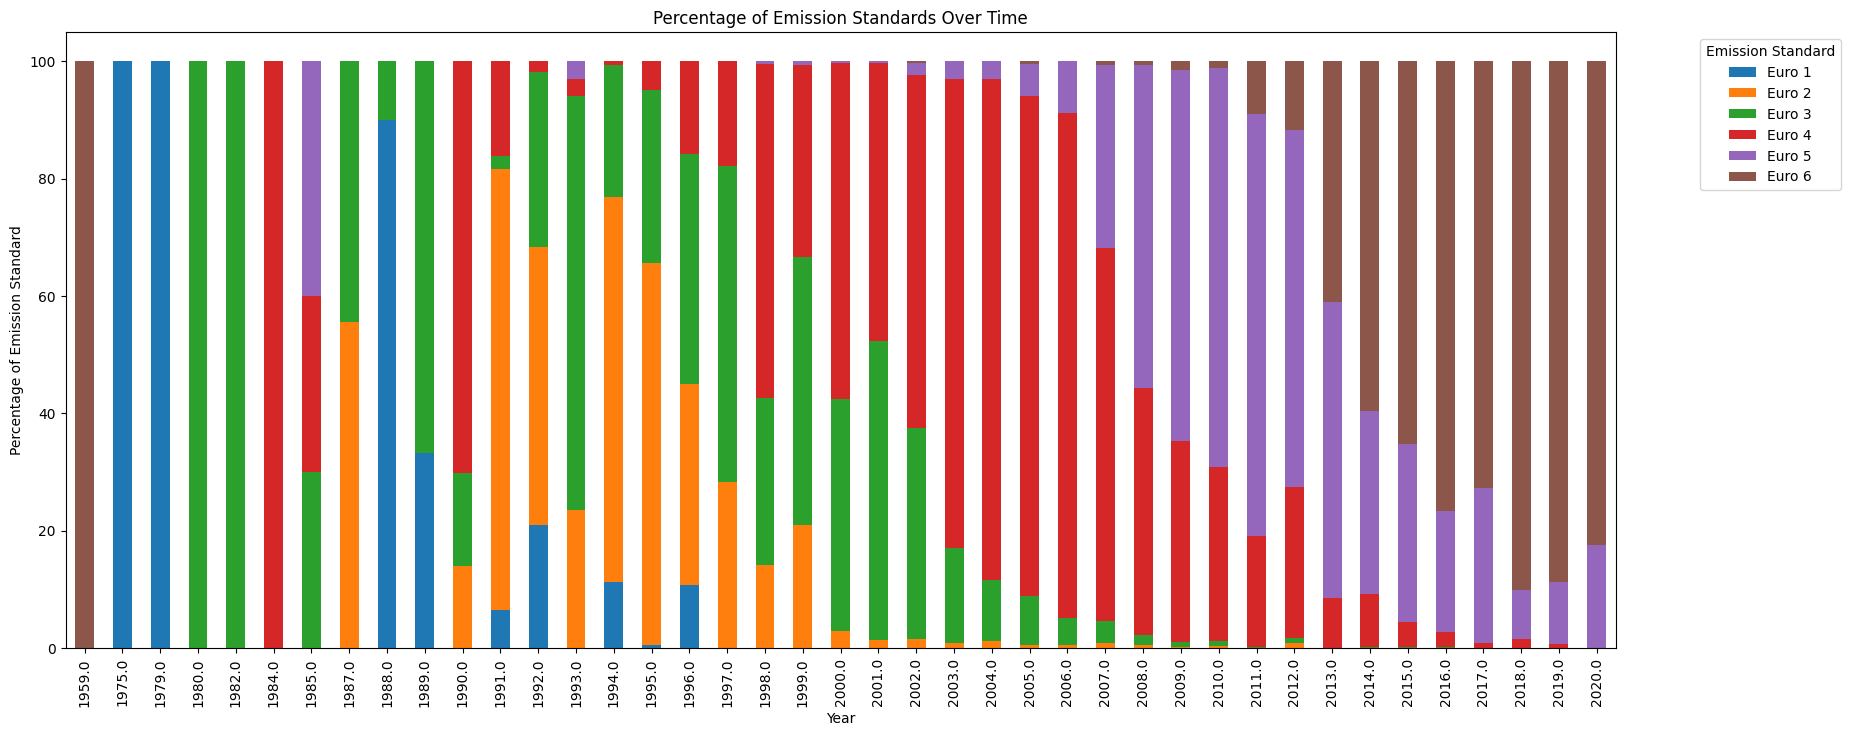

Most Common Emission Standards:
 emission_standards
Euro 4    7884
Euro 5    6874
Euro 6    4638
Euro 3    1881
Euro 2     876
Euro 1      79
Name: count, dtype: int64


In [ ]:
# What are the most common emission_standards and how have they changed over time?

# Analyze the distribution of emission standards over time (if available in your dataset).
# Assuming your dataset has a column named 'emission_standards'

emission_standards_over_time = car_data.groupby(['year_from', 'emission_standards'])['emission_standards'].count().unstack()
emission_standards_over_time = emission_standards_over_time.fillna(0)

# Calculate the percentage of each emission standard over time
emission_percentage_over_time = emission_standards_over_time.div(emission_standards_over_time.sum(axis=1), axis=0) * 100

# Plot the percentage change over time
emission_percentage_over_time.plot(kind='bar', figsize=(20, 8), stacked=True)
plt.xlabel('Year')
plt.ylabel('Percentage of Emission Standard')
plt.title('Percentage of Emission Standards Over Time')
plt.legend(title='Emission Standard', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=90)
plt.show()

# Find the most common emission standards
most_common_standards = car_data['emission_standards'].value_counts()
print("Most Common Emission Standards:\n", most_common_standards)

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='engine_type', ylabel='engine_hp'>

Text(0.5, 0, 'Engine Type')

Text(0, 0.5, 'Horsepower')

Text(0.5, 1.0, 'Impact of Engine Type on Horsepower')

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Gasoline'),
  Text(1, 0, 'Diesel'),
  Text(2, 0, 'Petrol'),
  Text(3, 0, 'Hybrid'),
  Text(4, 0, 'Liquefied coal hydrogen gases'),
  Text(5, 0, 'Electric'),
  Text(6, 0, 'Gasoline, Electric'),
  Text(7, 0, 'Diesel, Hybrid'),
  Text(8, 0, 'Rotor')])

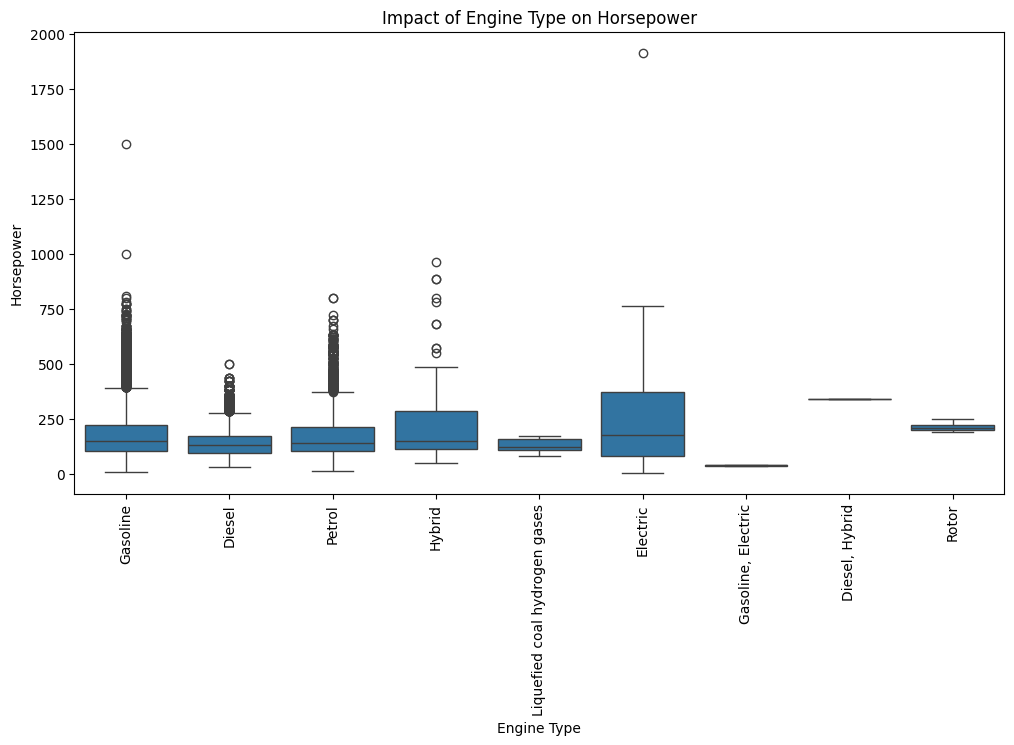

In [ ]:
# How does engine type (engine_type) impact horsepower (engine_hp) and mixed fuel consumption (mixed_fuel_consumption_per_100_km_l)?

# Analyze the impact of engine type on horsepower and fuel consumption
plt.figure(figsize=(12, 6))
sns.boxplot(x='engine_type', y='engine_hp', data=car_data)
plt.xlabel('Engine Type')
plt.ylabel('Horsepower')
plt.title('Impact of Engine Type on Horsepower')
plt.xticks(rotation=90)
plt.show()

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='engine_type', ylabel='mixed_fuel_consumption_per_100_km_l'>

Text(0.5, 0, 'Engine Type')

Text(0, 0.5, 'Mixed Fuel Consumption (L/100km)')

Text(0.5, 1.0, 'Impact of Engine Type on Fuel Consumption')

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Gasoline'),
  Text(1, 0, 'Diesel'),
  Text(2, 0, 'Petrol'),
  Text(3, 0, 'Hybrid'),
  Text(4, 0, 'Liquefied coal hydrogen gases'),
  Text(5, 0, 'Electric'),
  Text(6, 0, 'Gasoline, Electric'),
  Text(7, 0, 'Diesel, Hybrid'),
  Text(8, 0, 'Rotor')])

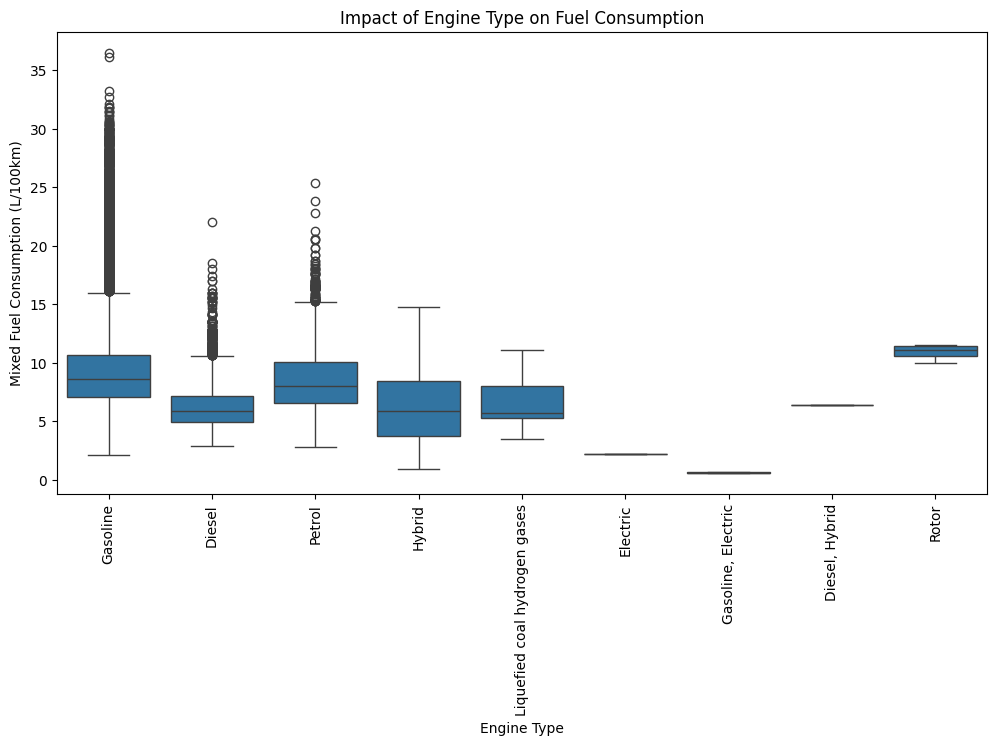

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='engine_type', y='mixed_fuel_consumption_per_100_km_l', data=car_data)
plt.xlabel('Engine Type')
plt.ylabel('Mixed Fuel Consumption (L/100km)')
plt.title('Impact of Engine Type on Fuel Consumption')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Calculate the average horsepower and fuel consumption for each engine type
engine_type_stats = car_data.groupby('engine_type').agg({'engine_hp': 'mean', 'mixed_fuel_consumption_per_100_km_l': 'mean'})
engine_type_stats

,engine_hp,mixed_fuel_consumption_per_100_km_l
engine_type,,
Diesel,140.019450,6.263248
"Diesel, Hybrid",340.000000,6.400000
Electric,272.850000,2.200000
Gasoline,173.805252,9.660653
"Gasoline, Electric",36.666667,0.633333
Hybrid,198.118998,6.413995
Liquefied coal hydrogen gases,129.103448,6.761538
Petrol,172.438383,8.554588
Rotor,214.285714,10.925000


In [ ]:
# top 5 body_types have low city_fuel_per_100km_l and high highway_fuel_per_100km_l

# Assuming 'car_data' is your DataFrame
top_body_types = car_data.groupby('body_type').agg({'city_fuel_per_100km_l': 'mean', 'highway_fuel_per_100km_l': 'mean'})

# Sort by city_fuel_per_100km_l in ascending order and highway_fuel_per_100km_l in descending order
top_body_types = top_body_types.sort_values(['city_fuel_per_100km_l', 'highway_fuel_per_100km_l'], ascending=[True, False])

# Get the top 5 body types
top_5_body_types = top_body_types.head(5)

print("Top 5 Body Types with Low City Fuel Consumption and High Highway Fuel Consumption:\n\n", top_5_body_types)


Top 5 Body Types with Low City Fuel Consumption and High Highway Fuel Consumption:

                    city_fuel_per_100km_l  highway_fuel_per_100km_l
body_type                                                         
Hatchback                       8.231597                  5.234021
Liftback                        9.349709                  5.765879
Hatchback 3 doors               9.550000                  6.100000
Minivan                        10.239157                  6.728313
Wagon                          10.466954                  6.395315


<Figure size 3000x600 with 0 Axes>

<Axes: xlabel='body_type'>

Text(0.5, 0, 'Body Type')

Text(0, 0.5, 'Average Highway Fuel Consumption (L/100km)')

Text(0.5, 1.0, 'Trend of Average Highway Fuel Consumption Over Body type')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Cabriolet'),
  Text(1, 0, 'Coupe'),
  Text(2, 0, 'Crossover'),
  Text(3, 0, 'Fastback'),
  Text(4, 0, 'Hatchback'),
  Text(5, 0, 'Hatchback 3 doors'),
  Text(6, 0, 'Liftback'),
  Text(7, 0, 'Limousine'),
  Text(8, 0, 'Minivan'),
  Text(9, 0, 'Pickup'),
  Text(10, 0, 'Roadster'),
  Text(11, 0, 'Sedan'),
  Text(12, 0, 'Targa'),
  Text(13, 0, 'Wagon'),
  Text(14, 0, 'hardtop')])

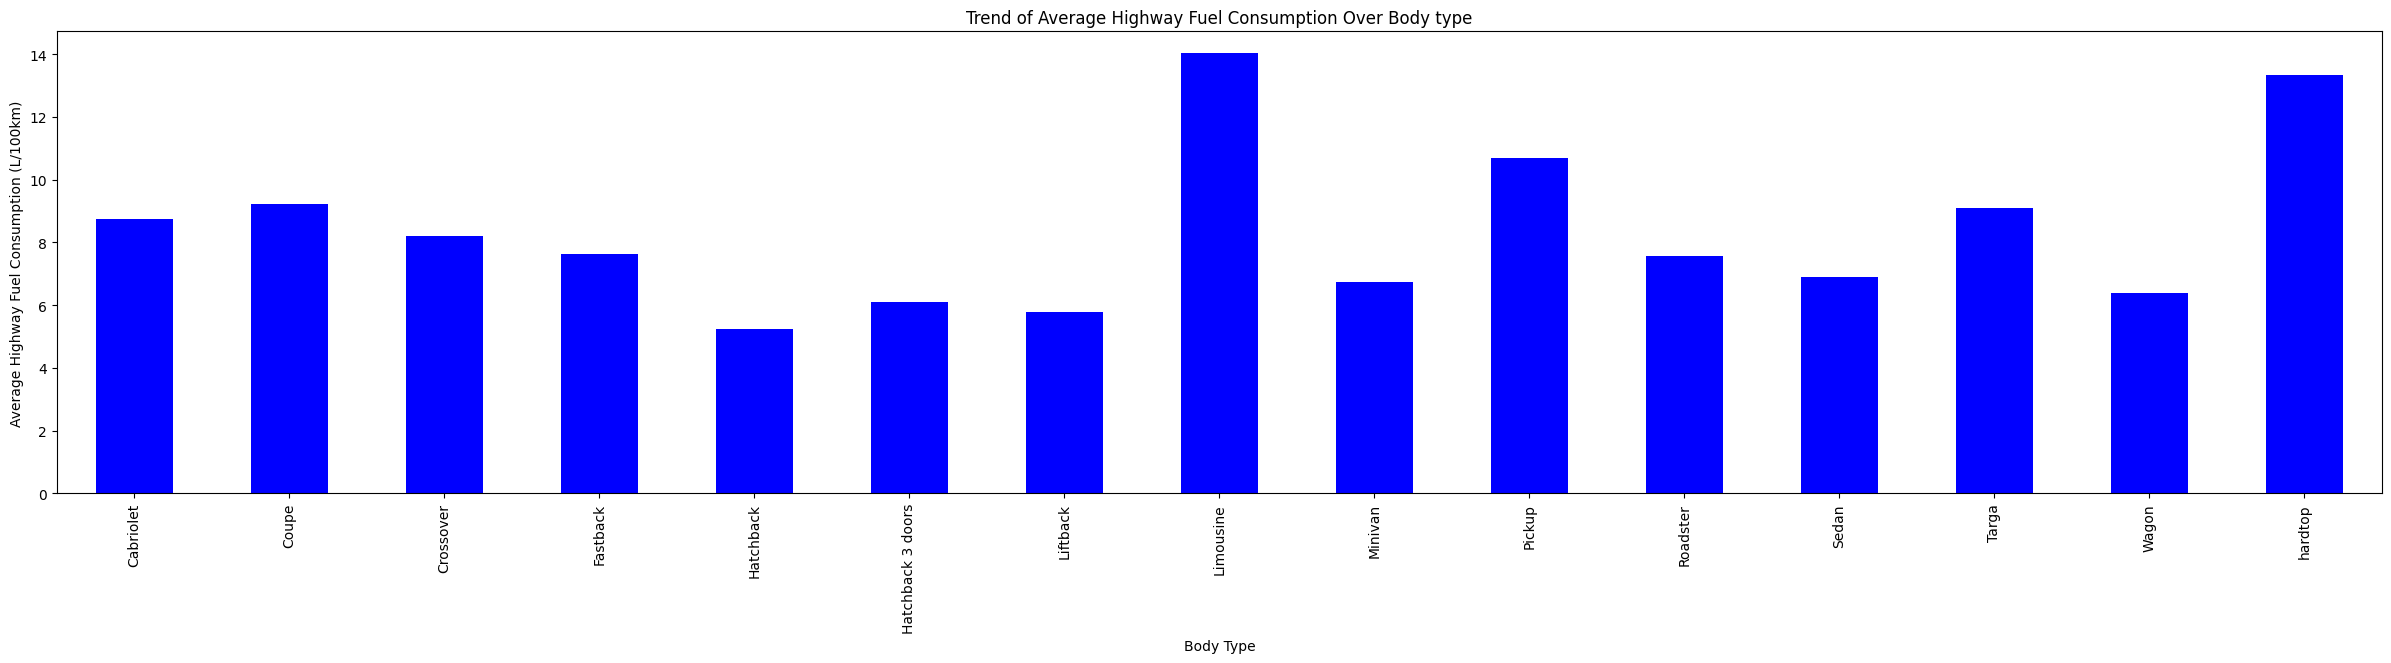

In [ ]:
# Distribution of highway_fuel_per_100km_l over body type

# Group data by 'body_type' and calculate the average 'highway_fuel_per_100km_l' for each year
average_highway_fuel_by_body_type = car_data.groupby('body_type')['highway_fuel_per_100km_l'].mean()

# Plot the trend
plt.figure(figsize=(30, 6))
# Use the plot function of the pandas Series with kind='bar'
average_highway_fuel_by_body_type.plot(kind='bar',color = 'blue')
plt.xlabel('Body Type')
plt.ylabel('Average Highway Fuel Consumption (L/100km)')
plt.title('Trend of Average Highway Fuel Consumption Over Body type')
plt.xticks(rotation=90)
plt.show()

<Figure size 3000x600 with 0 Axes>

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Average City Fuel Consumption (L/100km)')

Text(0.5, 1.0, 'Trend of Average City Fuel Consumption Over Years')

(array([1940., 1950., 1960., 1970., 1980., 1990., 2000., 2010., 2020.,
        2030.]),
 [Text(1940.0, 0, '1940'),
  Text(1950.0, 0, '1950'),
  Text(1960.0, 0, '1960'),
  Text(1970.0, 0, '1970'),
  Text(1980.0, 0, '1980'),
  Text(1990.0, 0, '1990'),
  Text(2000.0, 0, '2000'),
  Text(2010.0, 0, '2010'),
  Text(2020.0, 0, '2020'),
  Text(2030.0, 0, '2030')])

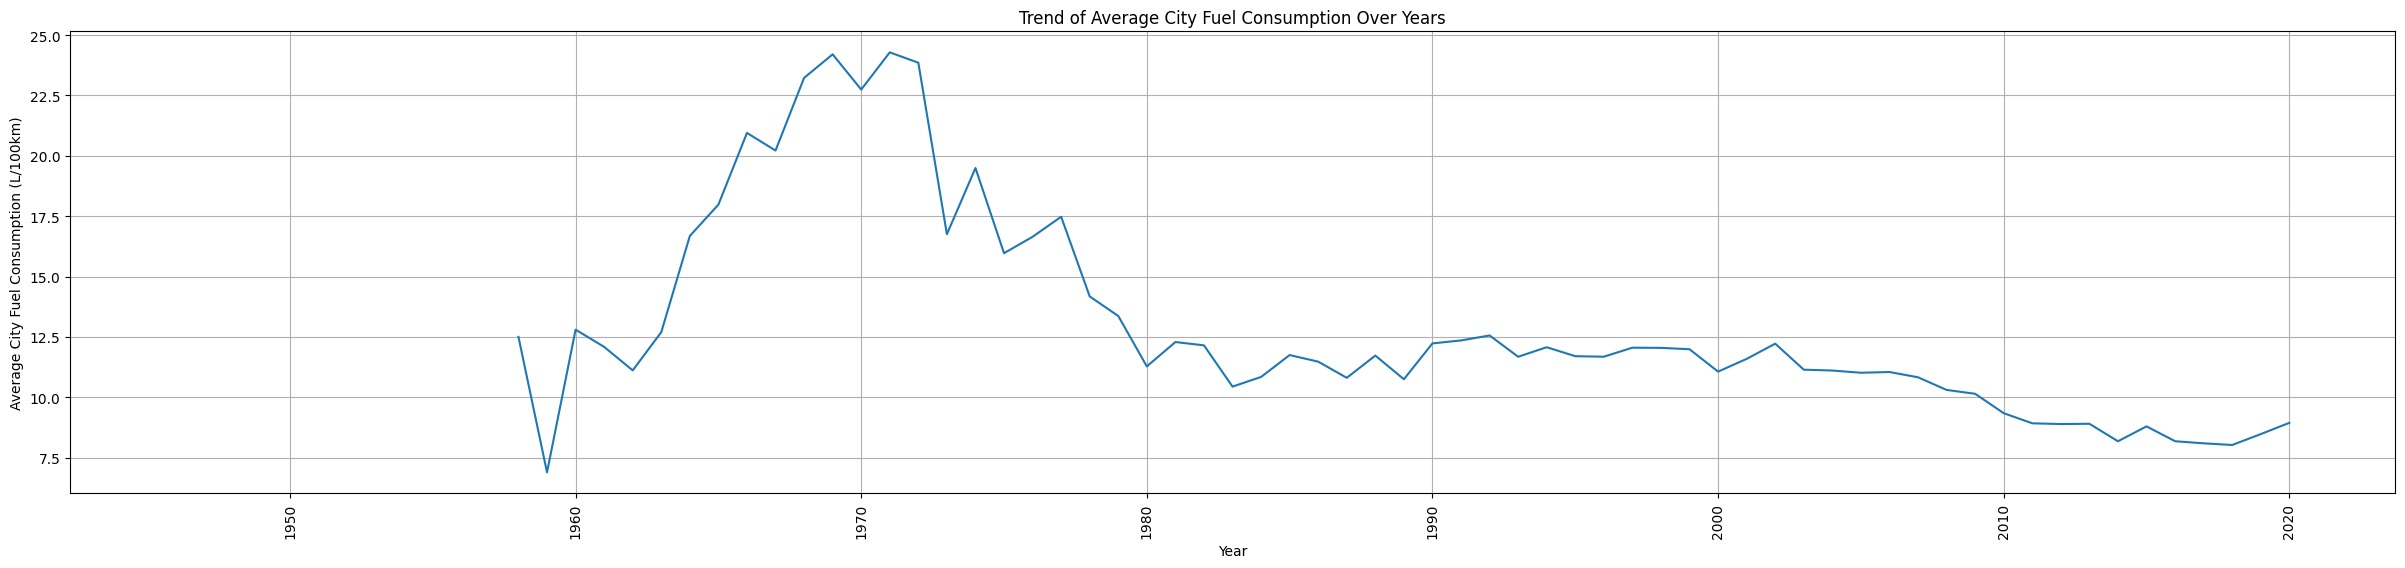

In [ ]:
# Group the data by year and calculate the average 'city_fuel_per_100km_l' for each year
average_city_fuel_by_year = car_data.groupby('year_from')['city_fuel_per_100km_l'].mean()

# Plot the trend
plt.figure(figsize=(30, 6))
plt.plot(average_city_fuel_by_year.index, average_city_fuel_by_year.values)
plt.xlabel('Year')
plt.ylabel('Average City Fuel Consumption (L/100km)')
plt.title('Trend of Average City Fuel Consumption Over Years')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

<Axes: >

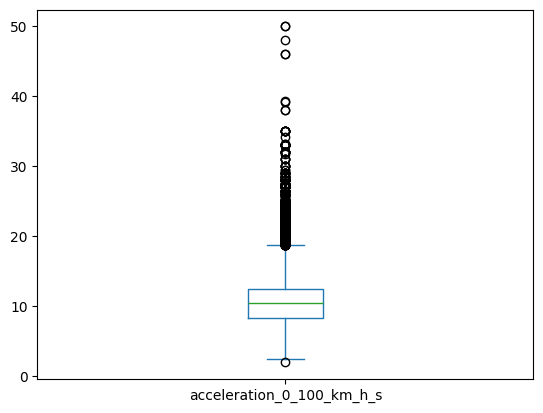

In [ ]:
car_data['acceleration_0_100_km_h_s'].plot(kind='box')

<Axes: >

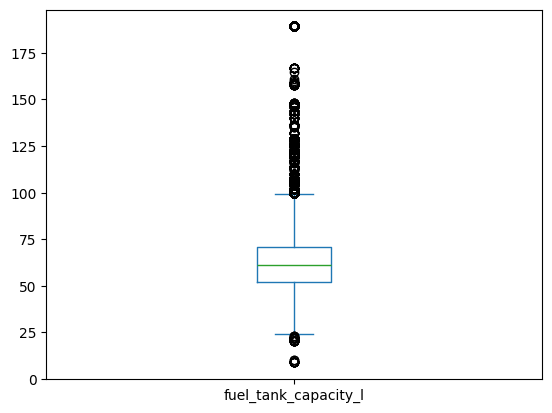

In [ ]:
car_data['fuel_tank_capacity_l'].plot(kind='box')

In [ ]:
# Create a new DataFrame to store the imputed values
new_car_data = car_data.copy()

# Iterate through each column
for column in new_car_data.columns:
  if new_car_data[column].isnull().any():  # Check if the column has NaN values
    if pd.api.types.is_numeric_dtype(new_car_data[column]):
      # Calculate the mean for numeric columns
      column_mean = new_car_data[column].mean()
      new_car_data[column].fillna(column_mean, inplace=True)
    else:
      # Calculate the median for non-numeric columns
      column_mode = new_car_data[column].mode()[0]
      new_car_data[column].fillna(column_mode, inplace=True)

# Now, 'new_car_data' contains the DataFrame with NaN values filled using mean or median.
new_car_data.count()

<ipython-input-529-45739148c87a>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_car_data[column].fillna(column_mode, inplace=True)
<ipython-input-529-45739148c87a>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

,0
id_trim,70823
make,70823
modle,70823
generation,70823
year_from,70823
...,...
electric_range_km,70823
charging_time_h,70823
range_km_min,70823
range_km_max,70823


In [ ]:
def label_encode_dataframe(df,ordinal_mappings):
    le = LabelEncoder()
    for column in ordinal_mappings:
        if column in df.columns:
            df[column] = le.fit_transform(df[column])
        else:
            print(f"Warning: Column '{column}' not found in the DataFrame.")
    return df

In [ ]:
ordinal_mappings = [
    'Make',
    'Modle',
    'Generation',
    'Series',
    'Trim',
    'Body_type',
    'injection_type',
    'overhead_camshaft',
    'cylinder_layout',
    'engine_type',
    'boost_type',
    'engine_placement',
    'presence_of_intercooler',
    'drive_wheels',
    'transmission',
    'emission_standards',
    'fuel_grade',
    'back_suspension',
    'rear_brakes',
    'front_brakes',
    'front_suspension',
    'steering_type',
    'car_class',
    'country_of_origin',
    'safety_assessment',
    'rating_name',
    'wheel_size_r14',
    'cylinder_bore_and_stroke_cycle_mm',
    'transmission'
]

label_encode_dataframe(new_car_data, [x.lower() for x in ordinal_mappings])

,id_trim,make,modle,generation,year_from,year_to,series,trim,body_type,load_height_mm,...,country_of_origin,number_of_doors,safety_assessment,rating_name,battery_capacity_kw_per_h,electric_range_km,charging_time_h,range_km_min,range_km_max,transmission_encoded
0,1,0,371,4,1993.0,2000.0,141,6252,0,681.939549,...,10,4.026973,6,1,13.321333,50.8,7.0,450.000000,1000.000000,4
1,2,0,371,4,1993.0,2000.0,141,7299,0,681.939549,...,10,4.026973,6,1,13.321333,50.8,7.0,600.000000,900.000000,4
2,3,0,371,4,1993.0,2000.0,141,7430,0,681.939549,...,10,4.026973,6,1,13.321333,50.8,7.0,618.272869,962.106879,0
3,4,0,371,4,1993.0,2000.0,795,5261,11,681.939549,...,10,4.026973,6,1,13.321333,50.8,7.0,618.272869,962.106879,6
4,5,0,371,4,1993.0,2000.0,795,5281,11,681.939549,...,10,4.026973,6,1,13.321333,50.8,7.0,618.272869,962.106879,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70818,70983,250,1460,4,2007.0,2009.0,869,4407,11,681.939549,...,2,5.000000,6,1,13.321333,50.8,7.0,618.272869,962.106879,6
70819,70984,250,1460,4,2007.0,2009.0,869,4526,11,681.939549,...,2,5.000000,6,1,13.321333,50.8,7.0,618.272869,962.106879,6
70820,70985,250,1460,4,2007.0,2009.0,869,4529,11,681.939549,...,2,5.000000,6,1,13.321333,50.8,7.0,618.272869,962.106879,6
70821,70986,250,1460,4,2007.0,2009.0,869,5969,11,681.939549,...,2,5.000000,6,1,13.321333,50.8,7.0,618.272869,962.106879,6


In [ ]:
columns_to_log_and_plot = ['capacity_cm3', 'engine_hp', 'curb_weight_kg', 'mixed_fuel_consumption_per_100_km_l','highway_fuel_per_100km_l','city_fuel_per_100km_l','co2_emissions_g_km']

for column in columns_to_log_and_plot:
  # Replace zero values with a small positive number to avoid errors during log transformation
  new_car_data[column] = new_car_data[column].replace(0, 0.001)

  # Apply log transformation
  new_car_data[column + '_log'] = np.log(new_car_data[column])

  # # Plot the histogram
  # plt.figure(figsize=(8, 6))
  # plt.hist(new_car_data[column + '_log'], bins=30)
  # plt.xlabel(column + ' (Log Transformed)')
  # plt.ylabel('Frequency')
  # plt.title('Histogram of ' + column + ' (Log Transformed)')
  # plt.show()


##**Can we predict a car's fuel efficiency (e.g., mixed_fuel_consumption_per_100_km_l) based on its engine specifications (capacity_cm3, engine_hp, number_of_cylinders), weight (curb_weight_kg), and transmission type?**

In [ ]:
correlation_matrix = new_car_data[['capacity_cm3_log', 'engine_hp_log', 'number_of_cylinders', 'curb_weight_kg_log', 'transmission','mixed_fuel_consumption_per_100_km_l_log','highway_fuel_per_100km_l_log','city_fuel_per_100km_l_log']].corr(method='spearman')
print(correlation_matrix['mixed_fuel_consumption_per_100_km_l_log'].sort_values(ascending=False))

mixed_fuel_consumption_per_100_km_l_log    1.000000
highway_fuel_per_100km_l_log               0.827820
city_fuel_per_100km_l_log                  0.812209
capacity_cm3_log                           0.569968
number_of_cylinders                        0.535084
engine_hp_log                              0.383190
curb_weight_kg_log                         0.325003
transmission                              -0.220945
Name: mixed_fuel_consumption_per_100_km_l_log, dtype: float64


In [ ]:
# Can we predict a car's fuel efficiency (e.g., mixed_fuel_consumption_per_100_km_l) based on its engine specifications (capacity_cm3, engine_hp, number_of_cylinders), weight (curb_weight_kg), and transmission type?

# Select features and target variable
X = new_car_data[['capacity_cm3_log', 'engine_hp_log', 'number_of_cylinders', 'curb_weight_kg_log', 'transmission']]
y = new_car_data['mixed_fuel_consumption_per_100_km_l_log']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)
print("Linear Regression:")
print(f"MSE: {lr_mse:.2f}")
print(f"R-squared: {lr_r2:.2f}")

# Random Forest Regression Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
print("\nRandom Forest Regression:")
print(f"MSE: {rf_mse:.2f}")
print(f"R-squared: {rf_r2:.2f}")

# XGBoost Regression Model
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)
print("\nXGBoost Regression:")
print(f"MSE: {xgb_mse:.2f}")
print(f"R-squared: {xgb_r2:.2f}")

# GradientBoosting Model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_r2 = r2_score(y_test, gb_predictions)
print("\nGradientBoosting Regression:")
print(f"MSE: {gb_mse:.2f}")
print(f"R-squared: {gb_r2:.2f}")
print('\n\n')

#---------------------------------------------------------------------------------------------------------------------------------------------#


# Select new features and target variable
X = new_car_data[['capacity_cm3_log', 'engine_hp_log', 'number_of_cylinders', 'curb_weight_kg_log', 'transmission','highway_fuel_per_100km_l_log','city_fuel_per_100km_l_log']]
y = new_car_data['mixed_fuel_consumption_per_100_km_l_log']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regression Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
print("\nRandom Forest Regression with new features:")
print(f"MSE: {rf_mse:.2f}")
print(f"R-squared: {rf_r2:.2f}")

LinearRegression()

Linear Regression:
MSE: 0.06
R-squared: 0.34


RandomForestRegressor(random_state=42)


Random Forest Regression:
MSE: 0.02
R-squared: 0.76


XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, ...)


XGBoost Regression:
MSE: 0.06
R-squared: 0.27


GradientBoostingRegressor(random_state=42)


GradientBoosting Regression:
MSE: 0.04
R-squared: 0.53





RandomForestRegressor(random_state=42)


Random Forest Regression with new features:
MSE: 0.01
R-squared: 0.89


The car's fuel efficiency (**mixed_fuel_consumption_per_100_km_l**) cannot be accurately predicted based solely on its **engine specifications** (capacity_cm3, engine_hp, number_of_cylinders), **weight** (curb_weight_kg), and **transmission type**, as none of the models produced a satisfactory R-squared value.

Among the models tested, **Random Forest** yielded the highest R-squared of **0.76**, which is not very impressive. However, after including two additional features — **`highway_fuel_per_100km_l** and **city_fuel_per_100km_l** — the R-squared improved significantly to **0.89**, making the model's predictions more reliable and acceptable.

## **Predict the max_speed_km_per_h based on car specifications (length_mm, width_mm, height_mm, wheelbase_mm, front_track_mm, rear_track_mm, curb_weight_kg, injection_type, cylinder_ layout, engine_type and so on).**

In [ ]:
correlation_matrix = new_car_data[['length_mm', 'width_mm', 'height_mm', 'wheelbase_mm', 'front_track_mm', 'rear_track_mm','maximum_torque_n_m',
                  'curb_weight_kg', 'engine_hp', 'capacity_cm3', 'number_of_cylinders',
                  'transmission', 'injection_type', 'cylinder_layout', 'engine_type','max_speed_km_per_h']].corr(method='spearman')
print(correlation_matrix['max_speed_km_per_h'].sort_values(ascending=False))

max_speed_km_per_h     1.000000
engine_hp              0.624263
maximum_torque_n_m     0.509996
rear_track_mm          0.375363
front_track_mm         0.361699
curb_weight_kg         0.357056
capacity_cm3           0.333292
width_mm               0.309132
number_of_cylinders    0.297175
length_mm              0.290189
wheelbase_mm           0.275982
cylinder_layout        0.173771
engine_type            0.067947
injection_type         0.029135
transmission          -0.090088
height_mm             -0.122374
Name: max_speed_km_per_h, dtype: float64


In [ ]:
# Predict the max_speed_km_per_h based on car specifications (length_mm, width_mm, height_mm, wheelbase_mm, front_track_mm, rear_track_mm, curb_weight_kg, injection_type, cylinder_ layout, engine_type and so on).

# Select features and target variable
X = new_car_data[['length_mm', 'width_mm', 'height_mm', 'wheelbase_mm', 'front_track_mm', 'rear_track_mm','maximum_torque_n_m',
                  'curb_weight_kg', 'engine_hp', 'capacity_cm3', 'number_of_cylinders',
                  'transmission', 'injection_type', 'cylinder_layout', 'engine_type']]
y = new_car_data['max_speed_km_per_h']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)
print("Linear Regression:")
print(f"MSE: {lr_mse:.2f}")
print(f"R-squared: {lr_r2:.2f}")

# Random Forest Regression Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
print("\nRandom Forest Regression:")
print(f"MSE: {rf_mse:.2f}")
print(f"R-squared: {rf_r2:.2f}")

# XGBoost Regression Model
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)
print("\nXGBoost Regression:")
print(f"MSE: {xgb_mse:.2f}")
print(f"R-squared: {xgb_r2:.2f}")

# GradientBoosting Model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_r2 = r2_score(y_test, gb_predictions)
print("\nGradientBoosting Regression:")
print(f"MSE: {gb_mse:.2f}")
print(f"R-squared: {gb_r2:.2f}")

LinearRegression()

Linear Regression:
MSE: 277.61
R-squared: 0.60


RandomForestRegressor(random_state=42)


Random Forest Regression:
MSE: 65.80
R-squared: 0.91


XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, ...)


XGBoost Regression:
MSE: 339.79
R-squared: 0.51


GradientBoostingRegressor(random_state=42)


GradientBoosting Regression:
MSE: 172.04
R-squared: 0.75


To predict **max_speed_km_per_h** based on various **car specifications** (length_mm, width_mm, height_mm, wheelbase_mm, front_track_mm, rear_track_mm, curb_weight_kg, injection_type, and others), multiple models were evaluated.

Among all the models, **Random Forest Regression** delivered the best performance with:  
- **Mean Squared Error (MSE):** 65.80  
- **R-squared:** 0.91  

These results indicate that Random Forest Regression provides the most accurate predictions for **max_speed_km_per_h**.

##**Can we predict the CO2_emissions_g/km of a car based on its engine_type, capacity_cm3, fuel_type, mixed_fuel_consumption_per_100_km_l, and emission_standards?**

In [ ]:
correlation_matrix = new_car_data[['engine_type', 'capacity_cm3', 'fuel_grade', 'mixed_fuel_consumption_per_100_km_l', 'emission_standards','body_type','co2_emissions_g_km']].corr(method='spearman')
print(correlation_matrix['co2_emissions_g_km'].sort_values(ascending=False))

co2_emissions_g_km                     1.000000
mixed_fuel_consumption_per_100_km_l    0.147417
capacity_cm3                           0.115226
engine_type                            0.051687
body_type                             -0.020648
fuel_grade                            -0.038693
emission_standards                    -0.095504
Name: co2_emissions_g_km, dtype: float64


In [ ]:
# Can we predict the CO2_emissions_g/km of a car based on its engine_type, capacity_cm3, fuel_type, mixed_fuel_consumption_per_100_km_l, and emission_standards?

# Select features and target variable
X = new_car_data[['engine_type', 'capacity_cm3_log', 'fuel_grade', 'mixed_fuel_consumption_per_100_km_l_log','body_type', 'emission_standards']]
y = new_car_data['co2_emissions_g_km_log']

# Convert categorical features to numerical using one-hot encoding
# X = pd.get_dummies(X, columns=['engine_type', 'fuel_type', 'emission_standards'], dummy_na=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)
print("Linear Regression:")
print(f"MSE: {lr_mse:.2f}")
print(f"R-squared: {lr_r2:.2f}")

# Random Forest Regression Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
print("\nRandom Forest Regression:")
print(f"MSE: {rf_mse:.2f}")
print(f"R-squared: {rf_r2:.2f}")

# XGBoost Regression Model
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)
print("\nXGBoost Regression:")
print(f"MSE: {xgb_mse:.2f}")
print(f"R-squared: {xgb_r2:.2f}")

# GradientBoosting Model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_r2 = r2_score(y_test, gb_predictions)
print("\nGradientBoosting Regression:")
print(f"MSE: {gb_mse:.2f}")
print(f"R-squared: {gb_r2:.2f}")

LinearRegression()

Linear Regression:
MSE: 0.00
R-squared: 0.05


RandomForestRegressor(random_state=42)


Random Forest Regression:
MSE: 0.00
R-squared: 0.62


XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, ...)


XGBoost Regression:
MSE: 0.00
R-squared: 0.04


GradientBoostingRegressor(random_state=42)


GradientBoosting Regression:
MSE: 0.00
R-squared: 0.51


We were unable to accurately predict **co2_emissions_g_km** of a car using features such as **engine_type**, **capacity_cm3**, **fuel_type**, **mixed_fuel_consumption_per_100_km_l**, and **emission_standards**. None of the models produced a satisfactory R-squared value.

The best result was obtained from **Random Forest Regression** with:  
- **Mean Squared Error (MSE):** 0.00  
- **R-squared:** 0.62  

However, this R-squared value is not high enough to reliably predict **co2_emissions_g_km**, indicating that the model’s performance is inadequate for making accurate predictions.

##**Can we predict Trunk capacity(max_trunk_capacity_l) based on the car physical dimensions (length_mm, width_mm, height_mm, wheelbase_mm, front_track_mm, rear_track_mm, curb_weight_kg)?**



In [ ]:
# We can do it categorical here by first grouping Series into small, medium, large group.
# Let's define a function to categorize trunk capacity
def categorize_trunk_capacity(capacity):
    if capacity <= 300:
        return 'Small'
    elif capacity <= 500:
        return 'Medium'
    else:
        return 'Large'

# Create a new column with the categorized trunk capacity
new_car_data['trunk_capacity_category'] = new_car_data['max_trunk_capacity_l'].apply(categorize_trunk_capacity)

# label encoded the new column
label_encode_dataframe(new_car_data, ['trunk_capacity_category'])

,id_trim,make,modle,generation,year_from,year_to,series,trim,body_type,load_height_mm,...,range_km_max,transmission_encoded,capacity_cm3_log,engine_hp_log,curb_weight_kg_log,mixed_fuel_consumption_per_100_km_l_log,highway_fuel_per_100km_l_log,city_fuel_per_100km_l_log,co2_emissions_g_km_log,trunk_capacity_category
0,1,0,371,4,1993.0,2000.0,141,6252,0,681.939549,...,1000.000000,4,8.161946,5.869297,7.319865,2.160523,2.197225,2.995732,5.051365,2
1,2,0,371,4,1993.0,2000.0,141,7299,0,681.939549,...,900.000000,4,8.434029,5.786897,7.319865,2.160523,2.302585,2.708050,5.051365,2
2,3,0,371,4,1993.0,2000.0,141,7430,0,681.939549,...,962.106879,0,8.505525,5.560682,7.272398,2.079442,1.943795,2.405287,5.051365,2
3,4,0,371,4,1993.0,2000.0,795,5261,11,681.939549,...,962.106879,6,7.869527,5.115955,7.291064,2.160523,1.943795,2.405287,5.051365,0
4,5,0,371,4,1993.0,2000.0,795,5281,11,681.939549,...,962.106879,6,7.869527,5.115955,7.291064,2.160523,1.943795,2.405287,5.051365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70818,70983,250,1460,4,2007.0,2009.0,869,4407,11,681.939549,...,962.106879,6,7.869527,5.115955,7.291064,2.160523,1.943795,2.405287,5.051365,0
70819,70984,250,1460,4,2007.0,2009.0,869,4526,11,681.939549,...,962.106879,6,7.869527,5.115955,7.291064,2.160523,1.943795,2.405287,5.051365,0
70820,70985,250,1460,4,2007.0,2009.0,869,4529,11,681.939549,...,962.106879,6,7.869527,5.115955,7.291064,2.160523,1.943795,2.405287,5.051365,0
70821,70986,250,1460,4,2007.0,2009.0,869,5969,11,681.939549,...,962.106879,6,7.869527,5.115955,7.291064,2.160523,1.943795,2.405287,5.051365,0


In [ ]:
# Predict Trunk capacity based on the car physical dimensions
# Select features and target variable
X = new_car_data[['length_mm', 'width_mm', 'height_mm', 'wheelbase_mm',
                  'front_track_mm', 'rear_track_mm', 'curb_weight_kg']]
y = new_car_data['max_trunk_capacity_l']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)
print("Linear Regression:")
print(f"MSE: {lr_mse:.2f}")
print(f"R-squared: {lr_r2:.2f}")

# Random Forest Regression Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
print("\nRandom Forest Regression:")
print(f"MSE: {rf_mse:.2f}")
print(f"R-squared: {rf_r2:.2f}")

# XGBoost Regression Model
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)
print("\nXGBoost Regression:")
print(f"MSE: {xgb_mse:.2f}")
print(f"R-squared: {xgb_r2:.2f}")

# GradientBoosting Model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_r2 = r2_score(y_test, gb_predictions)
print("\nGradientBoosting Regression:")
print(f"MSE: {gb_mse:.2f}")
print(f"R-squared: {gb_r2:.2f}")

LinearRegression()

Linear Regression:
MSE: 262399.10
R-squared: 0.16


RandomForestRegressor(random_state=42)


Random Forest Regression:
MSE: 25328.30
R-squared: 0.92


XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, ...)


XGBoost Regression:
MSE: 254724.42
R-squared: 0.19


GradientBoostingRegressor(random_state=42)


GradientBoosting Regression:
MSE: 170491.74
R-squared: 0.46


We can successfully predict **max_trunk_capacity_l** based on the car's physical dimensions, including **length_mm**, **width_mm**, **height_mm**, **wheelbase_mm**, **front_track_mm**, **rear_track_mm**, and **curb_weight_kg**.

Among all the models tested, **Random Forest Regression** produced the best results with an **R-squared of 0.92**, **Random Forest Regression** is the most reliable model, indicating that it is a great fit for predicting trunk capacity based on the car’s physical dimensions.